## Finding the Optimal Parameters (Hyperparameter Tuning) for Machine Learning Models

##IMPORT -> DATASET REVIEW

In [ ]:
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]
scipy: 1.11.4
numpy: 1.25.2
matplotlib: 3.7.1
pandas: 2.0.3
sklearn: 1.2.2


TO IMPORT LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

TO LOAD THE DATASET

In [ ]:
dataset = pandas.read_csv('features.csv')

TO DETERMINE THE DIMENSIONS OF THE DATASET

In [ ]:
print(dataset.shape)

(204, 10)


TO PEEK AT THE DATA

In [ ]:
print(dataset.head(20))

             Area    Perimeter  Mean_Intensity  Max_Intensity  Min_Intensity  \
0   633549.666667  4122.739657       71.743743     103.666667      27.000000   
1   547804.000000  4590.569768       70.042720     102.000000      24.000000   
2   543144.000000  4253.952861       70.727186     102.333333      23.333333   
3   650022.666667  4427.325444       75.667389     106.000000      21.000000   
4   651118.666667  4649.614477       72.840039     122.666667      29.666667   
5   673999.666667  4940.857815       68.838795     105.000000      24.666667   
6   592346.000000  4858.403654       70.997676     126.333333      27.333333   
7   598257.333333  4943.652740       69.840255     107.666667      30.333333   
8   706362.000000  4653.512986       71.568392     139.000000      27.333333   
9   842735.333333  4635.648965       91.003651     127.666667      46.666667   
10  761495.333333  4670.124145       82.624314     125.000000      48.000000   
11  412252.666667  3999.734198       72.

TO SEE THE STATISTICAL SUMMARY

In [ ]:
print(dataset.describe())

               Area    Perimeter  Mean_Intensity  Max_Intensity  \
count  2.040000e+02   204.000000      204.000000     204.000000   
mean   8.879743e+05  5652.061534       81.879466     149.666667   
std    2.456022e+05  1112.964379        8.809918      39.797641   
min    3.768723e+05  2999.416425       62.565938      91.666667   
25%    7.369886e+05  4854.276628       74.439137     125.000000   
50%    8.569893e+05  5574.171728       80.104247     134.666667   
75%    9.756227e+05  6255.563034       90.007286     170.083333   
max    1.784213e+06  9756.243288       98.102891     254.000000   

       Min_Intensity   Convex_Area      Extent  Eccentricity  \
count     204.000000  2.040000e+02  204.000000    204.000000   
mean       42.129085  1.056792e+06    0.660192      0.622322   
std        11.405316  2.656047e+05    0.079486      0.114814   
min        21.000000  5.123407e+05    0.444572      0.363239   
25%        31.916667  9.033217e+05    0.610116      0.538576   
50%        4

In [ ]:
dataset_0 = dataset[dataset['Label'] == 0]
dataset_1 = dataset[dataset['Label'] == 1]
dataset_2 = dataset[dataset['Label'] == 2]

In [ ]:
print(dataset_1.describe())

               Area    Perimeter  Mean_Intensity  Max_Intensity  \
count  6.600000e+01    66.000000       66.000000      66.000000   
mean   8.726232e+05  5818.156344       75.766634     159.676768   
std    2.187427e+05   837.160158        5.966283      35.979005   
min    3.768723e+05  4093.802188       62.565938      91.666667   
25%    7.553592e+05  5361.653438       72.443886     131.583333   
50%    8.476270e+05  5818.914020       74.580284     156.666667   
75%    9.422865e+05  6236.948508       77.378299     181.416667   
max    1.454467e+06  8060.126526       92.083717     238.666667   

       Min_Intensity   Convex_Area     Extent  Eccentricity  \
count      66.000000  6.600000e+01  66.000000     66.000000   
mean       35.752525  1.081362e+06   0.621904      0.660448   
std         6.811331  2.367148e+05   0.062762      0.100841   
min        27.000000  5.123407e+05   0.506803      0.419327   
25%        32.083333  9.223852e+05   0.568005      0.576133   
50%        33.3333

In [ ]:
print(dataset_2.describe())

               Area    Perimeter  Mean_Intensity  Max_Intensity  \
count  7.300000e+01    73.000000       73.000000      73.000000   
mean   9.562645e+05  6227.604016       82.305366     159.616438   
std    3.109124e+05  1328.851206        6.360190      50.896278   
min    4.599313e+05  2999.416425       72.715884     102.000000   
25%    7.247887e+05  5629.743144       77.775386     115.000000   
50%    9.180663e+05  6192.827680       80.881799     145.666667   
75%    1.090244e+06  7066.844924       86.802153     195.666667   
max    1.784213e+06  9756.243288       96.812910     254.000000   

       Min_Intensity   Convex_Area     Extent  Eccentricity  \
count      73.000000  7.300000e+01  73.000000     73.000000   
mean       40.853881  1.143514e+06   0.668396      0.626886   
std         9.636605  3.317683e+05   0.093321      0.125715   
min        24.666667  6.811960e+05   0.444572      0.363239   
25%        29.000000  8.809697e+05   0.607009      0.542868   
50%        46.0000

TO SEE THE CLASS DISTRIBUTION

In [ ]:
print(dataset.groupby('Label').size())

Label
0    65
1    66
2    73
dtype: int64


TO SHOW THE UNIVARIATE PLOT (BOX and WHISKER PLOTS)

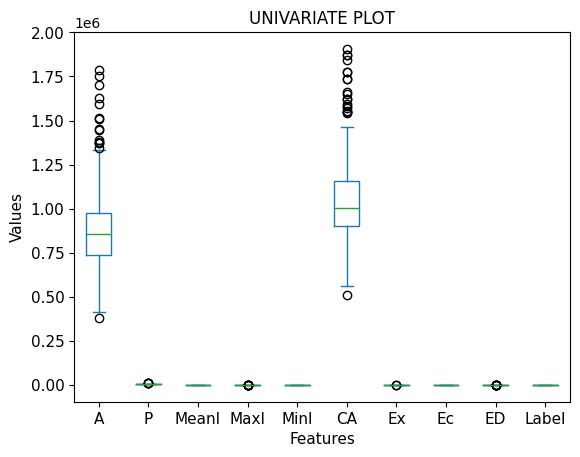

In [ ]:
new_column_names = ['A', 'P', 'MeanI', 'MaxI', 'MinI', 'CA', 'Ex', 'Ec', 'ED', 'Label']
dataset.columns = new_column_names

dataset.plot(kind='box', subplots=False, layout=(1,6), sharex=False, sharey=False)

# Set the font size for various elements
plt.xticks(fontsize=11)  # X-axis tick labels
plt.yticks(fontsize=11)  # Y-axis tick labels
plt.xlabel('Features', fontsize=11)  # X-axis label
plt.ylabel('Values', fontsize=11)  # Y-axis label
plt.title('UNIVARIATE PLOT', fontsize=12)  # Plot title

plt.show()

##### TO SHOW THE HISTOGRAM FOR THE DISTRIBUTION

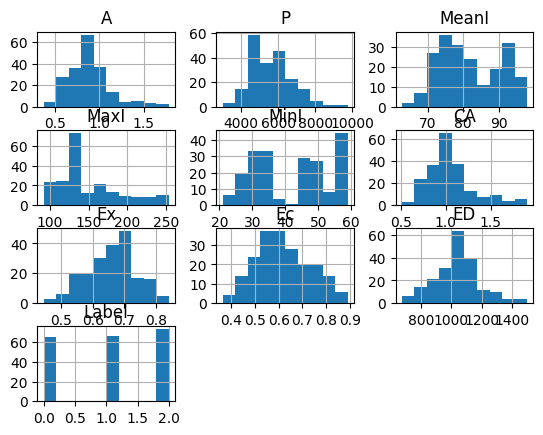

In [ ]:
dataset.hist()
plt.rcParams.update({'font.size': 5})
plt.show()

FOR THE MULTIVARIATE PLOT

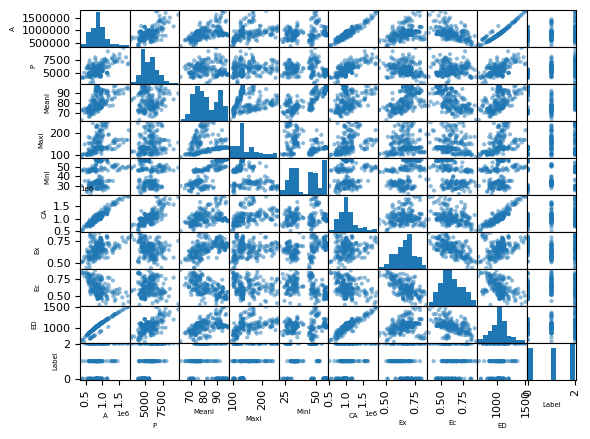

In [ ]:
# For the Scatter Plot Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.rcParams.update({'font.size': 6})
new_column_names = ['A', 'P', 'MeanI', 'MaxI', 'MinI', 'CA', 'Ex', 'Ec', 'ED', 'Label']
dataset.columns = new_column_names
plt.show()

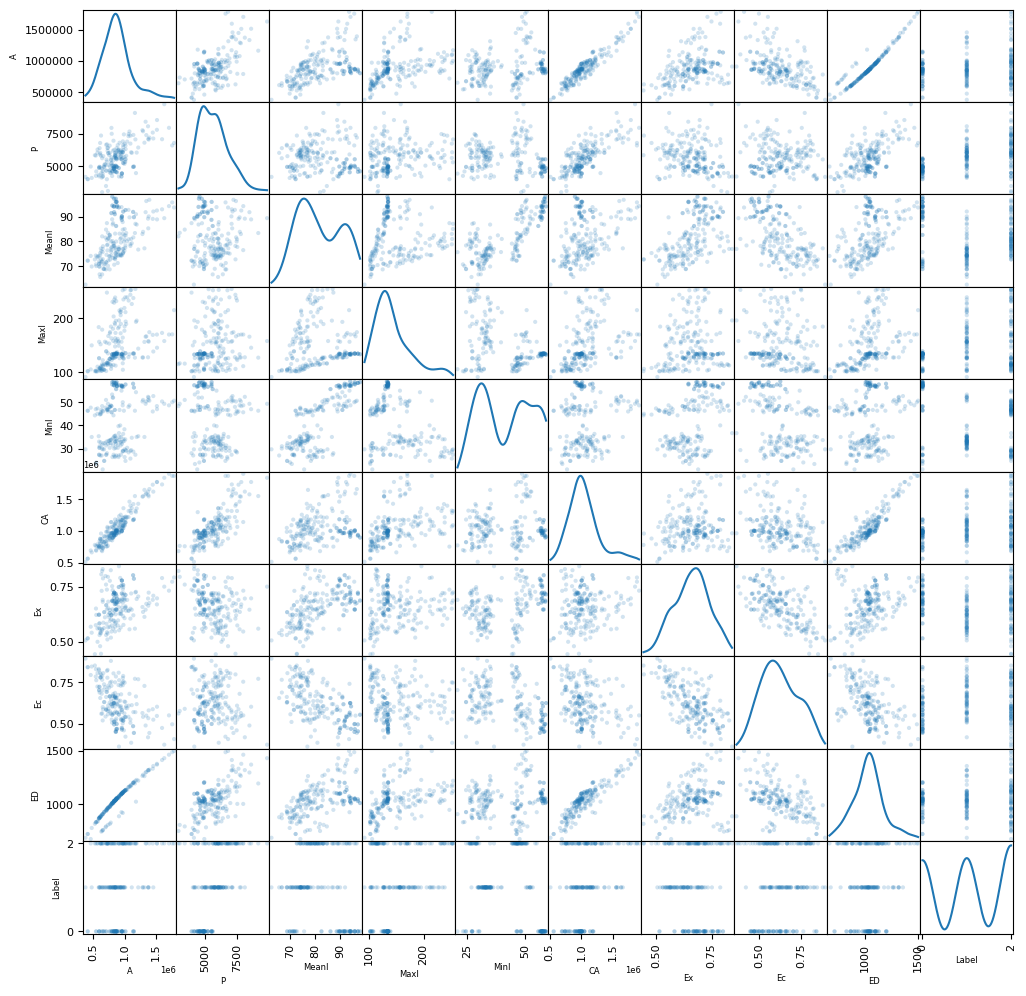

In [ ]:
# For the Scatter Plot Matrix
new_column_names = ['A', 'P', 'MeanI', 'MaxI', 'MinI', 'CA', 'Ex', 'Ec', 'ED', 'Label']
dataset.columns = new_column_names
scatter_matrix(dataset, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.rcParams.update({'font.size': 12})
plt.show()

##DATASET TRAIN-TEST SPLITTING

TO CREATE THE MATRIX OF INDEPENDENT VARIABLE, X

In [ ]:
X = dataset.iloc[:, :-1].values
X

array([[6.33549667e+05, 4.12273966e+03, 7.17437432e+01, ...,
        7.30377774e-01, 6.81415223e-01, 8.94581010e+02],
       [5.47804000e+05, 4.59056977e+03, 7.00427200e+01, ...,
        6.21708187e-01, 7.62875008e-01, 8.31215393e+02],
       [5.43144000e+05, 4.25395286e+03, 7.07271862e+01, ...,
        6.50614108e-01, 8.28947868e-01, 8.28949572e+02],
       ...,
       [8.23672333e+05, 5.03934687e+03, 7.93365484e+01, ...,
        6.83095771e-01, 6.37289371e-01, 1.02122678e+03],
       [8.05955667e+05, 4.84709274e+03, 8.01484003e+01, ...,
        6.46734958e-01, 6.68109985e-01, 1.01137777e+03],
       [7.16835667e+05, 3.99438304e+03, 8.73909125e+01, ...,
        7.35923374e-01, 7.06419517e-01, 9.45776866e+02]])

TO CREATE THE MATRIX OF DEPENDENT VARIABLE, Y

In [ ]:
Y = dataset.iloc[:, 9].values
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

TO ENCODE THE CATEGORICAL DATA IN THE DEPENDENT VARIABLE, Y

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

## TO SPLIT THE DATASET INTO TRAINING DATASET AND TESTING DATASET

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
# To Show the Shapes of X and Y Data
print(X.shape)
print(Y.shape)

(204, 9)
(204,)


In [ ]:
# To Show the Shapes of the New X Objects
print(X_train.shape)
print(X_test.shape)

(142, 9)
(62, 9)


In [ ]:
# To Show the Shapes of the New Y Objects
print(Y_train.shape)
print(Y_test.shape)

(142,)
(62,)


##FEATURE SELECTION

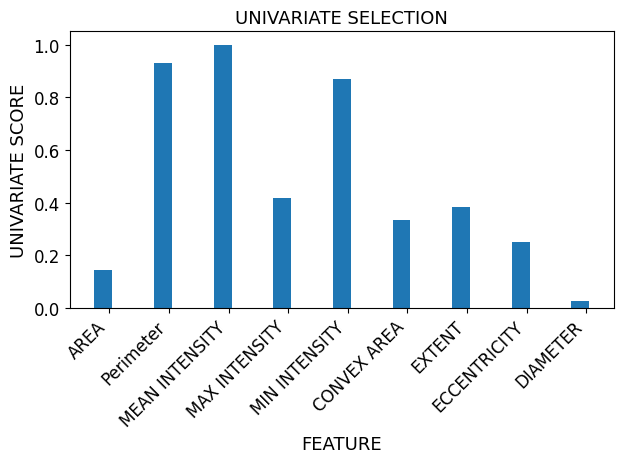

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
# Perform univariate feature selection
feature_names = ["AREA", "Perimeter", "MEAN INTENSITY", "MAX INTENSITY", "MIN INTENSITY",
                 "CONVEX AREA", "EXTENT", "ECCENTRICITY", "DIAMETER"]

selector = SelectKBest(f_classif, k=5)
selector.fit(X, Y)

# Calculate the univariate scores
scores = -np.log10(selector.pvalues_)
scores /= scores.max()  # Normalize scores

# Get nominal values
nominal_scores = -np.log10(selector.pvalues_)

# Plot the normalized scores
X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.1, scores, width=0.3)
plt.title("UNIVARIATE SELECTION", fontsize = 13)
plt.xlabel("FEATURE", fontsize = 13)
plt.ylabel(r"UNIVARIATE SCORE", fontsize = 13)
plt.xticks(X_indices, feature_names, rotation=45, ha="right")
plt.tight_layout()
plt.show()

##FEATURE SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler and MinMaxScaler
standardscaler = StandardScaler()
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_standard = X_train.copy()
X_test_standard = X_test.copy()

# Fit the StandardScaler on the training data and transform it
X_train_standard1 = standardscaler.fit_transform(X_train_standard)
X_test_standard1 = standardscaler.transform(X_test_standard)

# Fit the MinMaxScaler on the standardized training data and transform it
X_train_scaled = scaler.fit_transform(X_train_standard)
X_test_scaled = scaler.transform(X_test_standard)

# Convert the scaled data back to DataFrame for better readability
columns = ['A', 'P', 'MeanI', 'MaxI', 'MinI', 'CA', 'Ex', 'Ec', 'ED']
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columns)
X_test_scaled_df = pd.DataFrame(X_train_scaled, columns=columns)

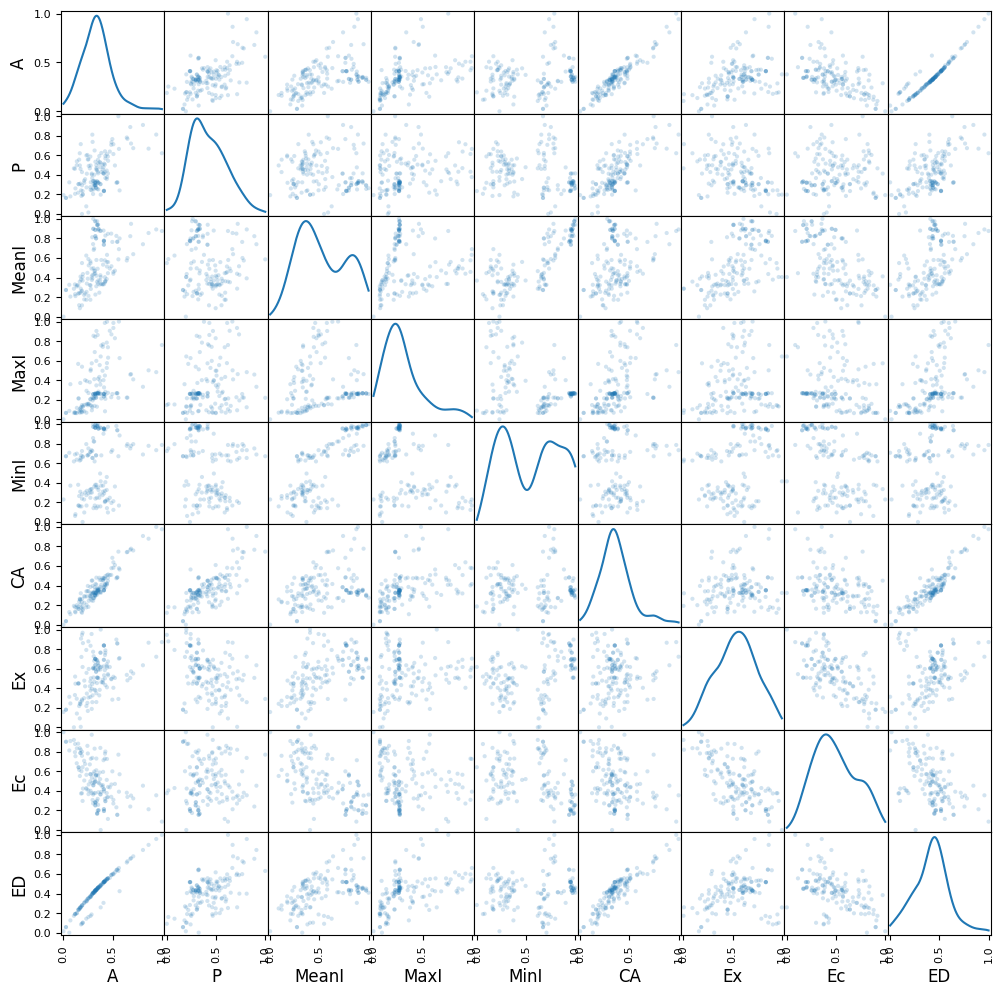

In [ ]:
new_column_names1 = ['A', 'P', 'MeanI', 'MaxI', 'MinI', 'CA', 'Ex', 'Ec', 'ED']
scatter_matrix(X_train_scaled_df[new_column_names1], alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.rcParams.update({'font.size': 5})
plt.show()

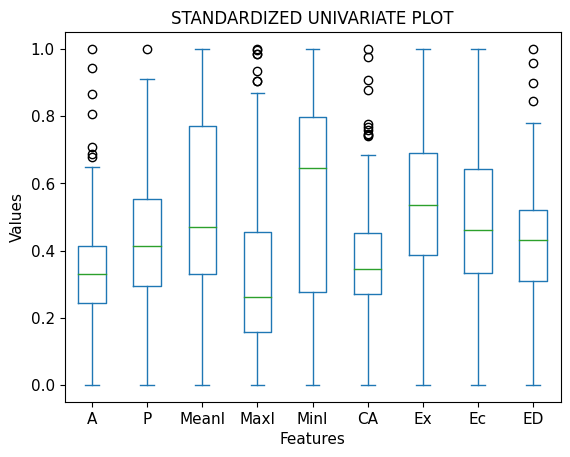

In [ ]:
X_train_scaled_df.plot(kind='box', subplots=False, layout=(1,6), sharex=False, sharey=False)

# Set the font size for various elements
plt.xticks(fontsize=11)  # X-axis tick labels
plt.yticks(fontsize=11)  # Y-axis tick labels
plt.xlabel('Features', fontsize=11)  # X-axis label
plt.ylabel('Values', fontsize=11)  # Y-axis label
plt.title('STANDARDIZED UNIVARIATE PLOT', fontsize=12)  # Plot title
plt.show()

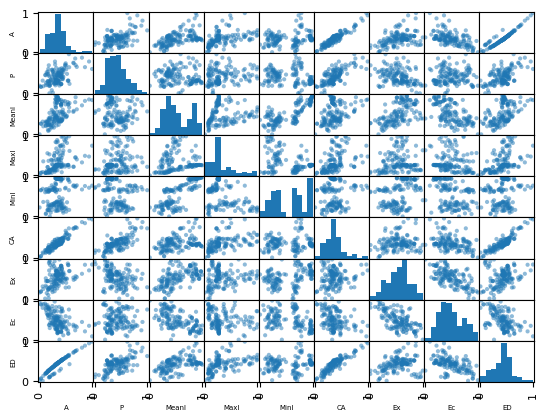

In [ ]:
# For the Scatter Plot Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(X_train_scaled_df)
plt.rcParams.update({'font.size': 6})
new_column_names = ['A', 'P', 'MeanI', 'MaxI', 'MinI', 'CA', 'Ex', 'Ec', 'ED', 'Label']
dataset.columns = new_column_names
plt.show()

## TO IMPORT DIFFERENT MACHINE LEARNING MODELS

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier


###### To Build Different Machine Learning Models

In [ ]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('NN', MLPClassifier(max_iter=800)))
models.append(('RFC', RandomForestClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('BC', BaggingClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('RC', RidgeClassifier()))
models.append(('SGDC', SGDClassifier()))
models

[('LR', LogisticRegression(max_iter=1000000)),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC()),
 ('NN', MLPClassifier(max_iter=800)),
 ('RFC', RandomForestClassifier()),
 ('ABC', AdaBoostClassifier()),
 ('GBC', GradientBoostingClassifier()),
 ('BC', BaggingClassifier()),
 ('ETC', ExtraTreesClassifier()),
 ('RC', RidgeClassifier()),
 ('SGDC', SGDClassifier())]

##### To Evaluate Each Model in Turn Using Default Parameters of All Models

In [ ]:
# For Test Options and Evaluation Metric
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

results = []
names = []

for name, model in models:
	k_Fold = StratifiedKFold(n_splits=8, shuffle=True, random_state=None)
	cv_results = cross_val_score(model, X_train_scaled_df, Y_train, cv=k_Fold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	printed_results = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(printed_results)

LR: 0.711601 (0.041102)
LDA: 0.851307 (0.064309)
KNN: 0.859069 (0.048484)
CART: 0.852533 (0.037276)
NB: 0.697712 (0.052390)
SVM: 0.888072 (0.062151)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

NN: 0.941993 (0.093019)
RFC: 0.908905 (0.054621)
ABC: 0.803513 (0.066623)
GBC: 0.922386 (0.055526)
BC: 0.894608 (0.086289)
ETC: 0.957925 (0.036916)
RC: 0.752042 (0.097417)
SGDC: 0.844771 (0.089348)


<ipython-input-30-63669e0ca8db>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(names, fontsize = 10)  # Increase font size for x-axis labels


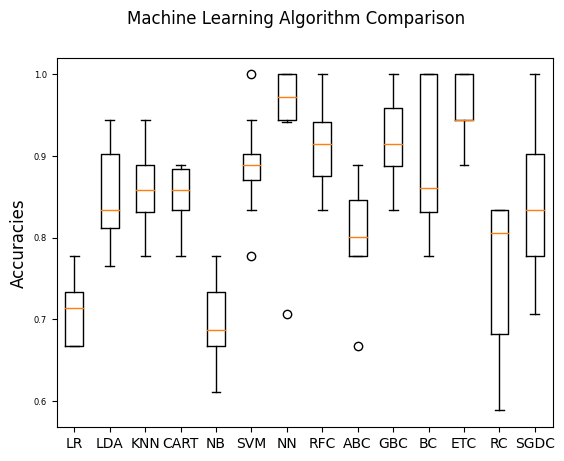

In [ ]:
figure = plt.figure()
figure.suptitle('Machine Learning Algorithm Comparison', fontsize = 12)
axis = figure.add_subplot(111)
axis.set_xticklabels(names, fontsize = 10)  # Increase font size for x-axis labels
axis.set_ylabel('Accuracies', fontsize = 12)  # Increase font size for y-axis label
plt.boxplot(results)
axis.set_xticklabels(names)
plt.show()

##TOP MACHINE LEARNING MODELS

### RANDOM FOREST CLASSIFIER

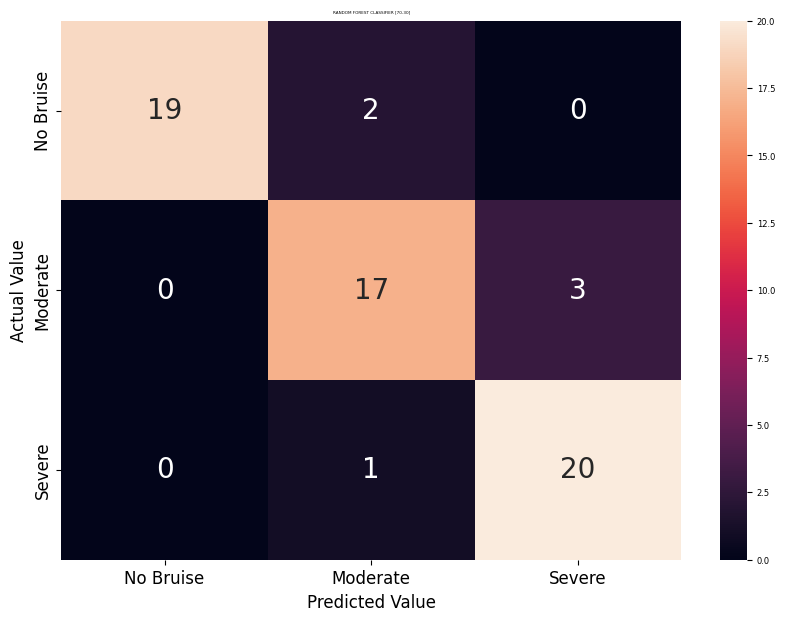

Classification Accuracy: 0.9032
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.85      0.85      0.85        20
           2       0.87      0.95      0.91        21

    accuracy                           0.90        62
   macro avg       0.91      0.90      0.90        62
weighted avg       0.91      0.90      0.90        62



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Instantiate the model
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train_scaled, Y_train)
Y_predict_RF = random_forest.predict(X_test_scaled)

# Show the confusion matrix
confusion_matrix_RF = confusion_matrix(Y_test, Y_predict_RF)
plt.figure(figsize=(10,7))
labels = ["No Bruise", "Moderate", "Severe"]
sns.heatmap(confusion_matrix_RF, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, annot_kws={"size": 20})
plt.title("RANDOM FOREST CLASSIFIER [70-30]", fontsize=3)
plt.xlabel("Predicted Value", fontsize=12)
plt.ylabel("Actual Value", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Classification accuracy
classification_accuracy_RF = accuracy_score(Y_test, Y_predict_RF)
print('Classification Accuracy: %.4f' % classification_accuracy_RF)

# Classification report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_RF))

#####CROSS-VALIDATION RANDOM FOREST

In [ ]:
# To Apply K-Fold Cross-Validation to Assess the Model's Performance

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

k_fold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

# A. To Feature Scale the X variable Using the Standardization Feature Scaling
X_train_standard = X.copy()
X_train_scaled = scaler.fit_transform(X_train_standard)

## B. To Feature Select the X variable Using the Univariate Feature Selection
##selector = SelectKBest(f_classif, k=5)
##selector.fit(X_train_scaled, Y)

# B. For the Accuracy as Scoring Metric for the Cross-Validation
random_forest = RandomForestClassifier(random_state=0)
accuracies = cross_val_score(estimator = random_forest, X = X_train_scaled, y = Y, cv = k_fold, scoring = "accuracy")
accuracies_average = accuracies.mean()
accuracies_standard_deviation = accuracies.std()

print("Accuracies of k-Folds:", accuracies)
print(" ")
print("Average of the Accuracies of k-Folds:", accuracies_average)
print(" ")
print("Standard Deviation of the Accuracies of k-Folds:", accuracies_standard_deviation)
print(" ")

# C. For the F-1 as Scoring Metric for the Cross-Validation
f1_scores = cross_val_score(estimator = random_forest, X = X_train_scaled, y = Y, cv = k_fold, scoring = "f1_weighted")
f1_scores_average = f1_scores.mean()
f1_scores_standard_deviation = f1_scores.std()

print("F1-scores of k-Folds:", f1_scores)
print(" ")
print("Average of the F1-scores of k-Folds:", f1_scores_average)
print(" ")
print("Standard Deviation of the F1-scores of k-Folds:", f1_scores_standard_deviation)
print(" ")

# D. For the Precision as Scoring Metric for the Cross-Validation
precision_scores = cross_val_score(estimator = random_forest, X = X_train_scaled, y = Y, cv = k_fold, scoring = "precision_weighted")
precision_scores_average = precision_scores.mean()
precision_scores_standard_deviation = precision_scores.std()

print("Precision Scores of k-Folds:", precision_scores)
print(" ")
print("Average of the Precision Scores of k-Folds:", precision_scores_average)
print(" ")
print("Standard Deviation of the Precision Scores of k-Folds:", precision_scores_standard_deviation)
print(" ")

# E. For the Recall as Scoring Metric for the Cross-Validation
recall_scores = cross_val_score(estimator = random_forest, X = X_train_scaled, y = Y, cv = k_fold, scoring = "recall_weighted")
recall_scores_average = recall_scores.mean()
recall_scores_standard_deviation = recall_scores.std()

print("Recall Scores of k-Folds:", recall_scores)
print(" ")
print("Average of the Recall Scores of k-Folds:", recall_scores_average)
print(" ")
print("Standard Deviation of the Recall Scores of k-Folds:", recall_scores_standard_deviation)
print(" ")

# F. For the ROC-AUC as Scoring Metric for the Cross-Validation
roc_auc_scores = cross_val_score(estimator = random_forest, X = X_train_scaled, y = Y, cv = k_fold, scoring = "roc_auc_ovr")
roc_auc_scores_average = roc_auc_scores.mean()
roc_auc_scores_standard_deviation = roc_auc_scores.std()

print("ROC-AUC Scores of k-Folds:", roc_auc_scores)
print(" ")
print("Average of the ROC-AUC Scores of k-Folds:", roc_auc_scores_average)
print(" ")
print("Standard Deviation of the ROC-AUC Scores of k-Folds:", roc_auc_scores_standard_deviation)
print(" ")

Accuracies of k-Folds: [0.95238095 0.9047619  1.         0.95238095 0.85       0.95
 0.95       0.95       1.         0.85      ]
 
Average of the Accuracies of k-Folds: 0.9359523809523809
 
Standard Deviation of the Accuracies of k-Folds: 0.05008439589351299
 
F1-scores of k-Folds: [0.95213675 0.9041847  1.         0.95238095 0.84818182 0.94974359
 0.94974359 0.95       1.         0.84945055]
 
Average of the F1-scores of k-Folds: 0.9355821955821956
 
Standard Deviation of the F1-scores of k-Folds: 0.05050525792357929
 
Precision Scores of k-Folds: [0.95833333 0.91071429 1.         0.95833333 0.8525     0.95625
 0.95625    0.95714286 1.         0.86666667]
 
Average of the Precision Scores of k-Folds: 0.9416190476190476
 
Standard Deviation of the Precision Scores of k-Folds: 0.04749704460313024
 
Recall Scores of k-Folds: [0.95238095 0.9047619  1.         0.95238095 0.85       0.95
 0.95       0.95       1.         0.85      ]
 
Average of the Recall Scores of k-Folds: 0.935952380952

#####HOLD OUT VALIDATION RANDOM FOREST

Classification Accuracy: 0.9032
 
Classification Error: 0.0968
 
Sensitivity: 0.9032
 
Specificity: 0.9048
 
False Positive Rate: 0.0952
 
False Negative Rate: 0.0968
 
Precision: 0.9074
 
F1-score: 0.9039
 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.85      0.85      0.85        20
           2       0.87      0.95      0.91        21

    accuracy                           0.90        62
   macro avg       0.91      0.90      0.90        62
weighted avg       0.91      0.90      0.90        62



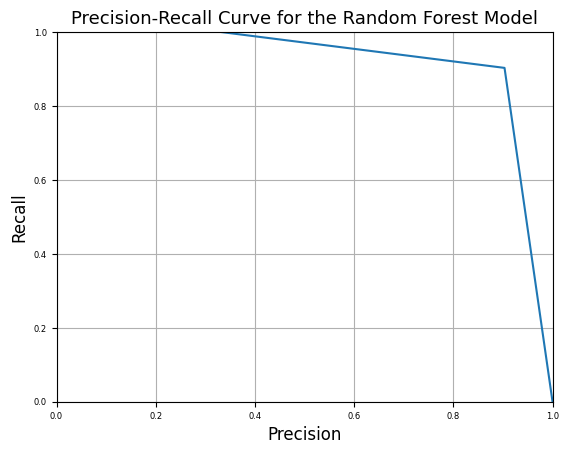

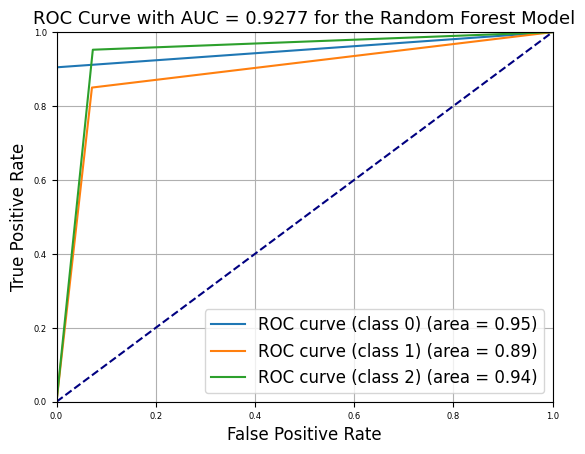

In [ ]:
# Performance evaluation using hold-out validation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# A. For the Classification Accuracy
classification_accuracy = accuracy_score(Y_test, Y_predict_RF)
print("Classification Accuracy: %.4f" % classification_accuracy)
print(" ")

# B. For the Classification Error
classification_error = 1 - classification_accuracy
print("Classification Error: %.4f" % classification_error)
print(" ")

# C. For the Sensitivity, Recall Score, Probability of Detection, True Positive Rate
sensitivity = recall_score(Y_test, Y_predict_RF, average="weighted")
print("Sensitivity: %.4f" % sensitivity)
print(" ")

# D. For the Specificity, True Negative Rate
TN = confusion_matrix_RF[0, 0]
FP = confusion_matrix_RF[0, 1:].sum()
specificity = TN / (TN + FP)
print("Specificity: %.4f" % specificity)
print(" ")

# E. For the False Positive Rate
false_positive_rate = 1 - specificity
print("False Positive Rate: %.4f" % false_positive_rate)
print(" ")

# F. For the False Negative Rate
false_negative_rate = 1 - sensitivity
print("False Negative Rate: %.4f" % false_negative_rate)
print(" ")

# G. For the Precision or Positive Predictive Value
precision = precision_score(Y_test, Y_predict_RF, average="weighted")
print("Precision: %.4f" % precision)
print(" ")

# H. For the F1-score
f1 = f1_score(Y_test, Y_predict_RF, average="weighted")
print("F1-score: %.4f" % f1)
print(" ")

# I. For the Classification Report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_RF))

# J. For the Precision-Recall Curve
precision_value, recall_value, _ = precision_recall_curve(label_binarize(Y_test, classes=[0, 1, 2]).ravel(), label_binarize(Y_predict_RF, classes=[0, 1, 2]).ravel())
plt.plot(precision_value, recall_value)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("Precision-Recall Curve for the Random Forest Model", fontsize = 13)
plt.xlabel("Precision", fontsize = 12)
plt.ylabel("Recall", fontsize = 12)
plt.grid(True)
plt.show()

# K. ROC Curve with AUC
# Binarize the output
Y_test_binarized = label_binarize(Y_test, classes=[0, 1, 2])
Y_predict_binarized = label_binarize(Y_predict_RF, classes=[0, 1, 2])

# K.1 ROC Curve
FPR = dict()
TPR = dict()
roc_auc = dict()
for i in range(3):  # Assuming 3 classes
    FPR[i], TPR[i], _ = roc_curve(Y_test_binarized[:, i], Y_predict_binarized[:, i])
    roc_auc[i] = auc(FPR[i], TPR[i])

# K.2 AUC
AUC_score = roc_auc_score(Y_test_binarized, Y_predict_binarized, average="weighted")

# K.3 ROC Curve with AUC
for i in range(3):
    plt.plot(FPR[i], TPR[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

# K.4 Plot of Baseline for AUC
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title(f"ROC Curve with AUC = {AUC_score:.4f} for the Random Forest Model", fontsize = 13)
plt.xlabel("False Positive Rate", fontsize = 12)
plt.ylabel("True Positive Rate", fontsize = 12)
plt.legend(loc="lower right", fontsize = 12)
plt.grid(True)
plt.show()

### EXTRA TREES CLASSIFIER

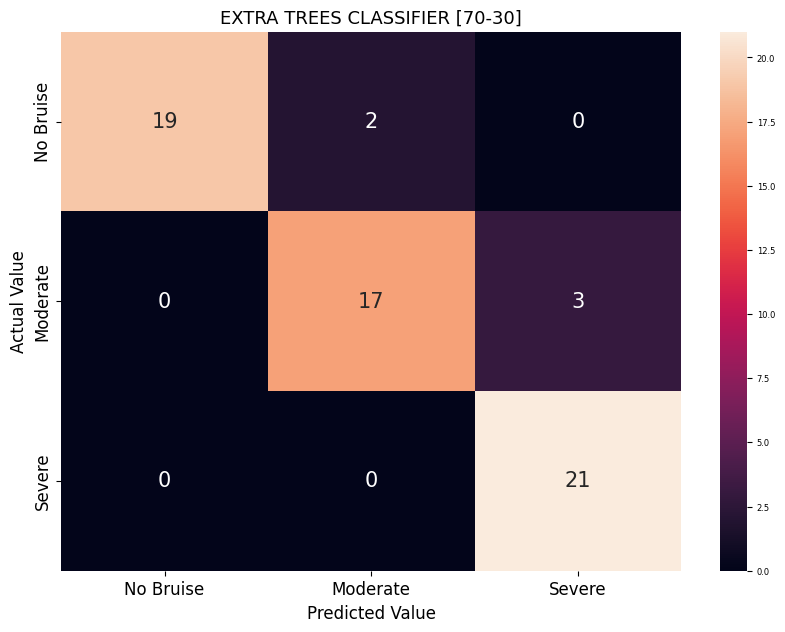

Classification Accuracy: 0.9194
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.89      0.85      0.87        20
           2       0.88      1.00      0.93        21

    accuracy                           0.92        62
   macro avg       0.92      0.92      0.92        62
weighted avg       0.92      0.92      0.92        62



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Instantiate the model
extra_trees = ExtraTreesClassifier(random_state=0)

X_train_standard = X_train.copy()
X_train_scaled = scaler.fit_transform(X_train_standard)

# Fit the training dataset into the ExtraTreesClassifier model
extra_trees.fit(X_train_scaled, Y_train)
Y_predict_ET = extra_trees.predict(X_test_scaled)

# Show the confusion matrix
confusion_matrix_ET = confusion_matrix(Y_test, Y_predict_ET)
labels = ["No Bruise", "Moderate", "Severe"]
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix_ET, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, annot_kws={"size": 15})
plt.title("EXTRA TREES CLASSIFIER [70-30]", fontsize=13)
plt.xlabel("Predicted Value", fontsize=12)
plt.ylabel("Actual Value", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Classification accuracy
classification_accuracy_ET = accuracy_score(Y_test, Y_predict_ET)
print('Classification Accuracy: %.4f' % classification_accuracy_ET)

# Classification report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_ET))

#####CROSS-VALIDATION EXTRA TREES

In [ ]:
# To Apply K-Fold Cross-Validation to Assess the Model's Performance

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

k_fold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

# A. To Feature Scale the X variable Using the Standardization Feature Scaling
X_train_standard = X_train.copy()
X_train_scaled = scaler.fit_transform(X_train_standard)

## B. To Feature Select the X variable Using the Univariate Feature Selection
##selector = SelectKBest(f_classif, k=5)
##selector.fit(X_train_scaled, Y)

# B. For the Accuracy as Scoring Metric for the Cross-Validation
extra_trees = ExtraTreesClassifier(random_state=0)
accuracies = cross_val_score(estimator = extra_trees, X = X_train_scaled, y = Y_train, cv = k_fold, scoring = "accuracy")
accuracies_average = accuracies.mean()
accuracies_standard_deviation = accuracies.std()

print("Accuracies of k-Folds:", accuracies)
print(" ")
print("Average of the Accuracies of k-Folds:", accuracies_average)
print(" ")
print("Standard Deviation of the Accuracies of k-Folds:", accuracies_standard_deviation)
print(" ")

# C. For the F-1 as Scoring Metric for the Cross-Validation
f1_scores = cross_val_score(estimator = extra_trees, X = X_train_scaled, y = Y_train, cv = k_fold, scoring = "f1_weighted")
f1_scores_average = f1_scores.mean()
f1_scores_standard_deviation = f1_scores.std()

print("F1-scores of k-Folds:", f1_scores)
print(" ")
print("Average of the F1-scores of k-Folds:", f1_scores_average)
print(" ")
print("Standard Deviation of the F1-scores of k-Folds:", f1_scores_standard_deviation)
print(" ")

# D. For the Precision as Scoring Metric for the Cross-Validation
precision_scores = cross_val_score(estimator = extra_trees, X = X_train_scaled, y = Y_train, cv = k_fold, scoring = "precision_weighted")
precision_scores_average = precision_scores.mean()
precision_scores_standard_deviation = precision_scores.std()

print("Precision Scores of k-Folds:", precision_scores)
print(" ")
print("Average of the Precision Scores of k-Folds:", precision_scores_average)
print(" ")
print("Standard Deviation of the Precision Scores of k-Folds:", precision_scores_standard_deviation)
print(" ")

# E. For the Recall as Scoring Metric for the Cross-Validation
recall_scores = cross_val_score(estimator = extra_trees, X = X_train_scaled, y = Y_train, cv = k_fold, scoring = "recall_weighted")
recall_scores_average = recall_scores.mean()
recall_scores_standard_deviation = recall_scores.std()

print("Recall Scores of k-Folds:", recall_scores)
print(" ")
print("Average of the Recall Scores of k-Folds:", recall_scores_average)
print(" ")
print("Standard Deviation of the Recall Scores of k-Folds:", recall_scores_standard_deviation)
print(" ")

# F. For the ROC-AUC as Scoring Metric for the Cross-Validation
roc_auc_scores = cross_val_score(estimator = extra_trees, X = X_train_scaled, y = Y_train, cv = k_fold, scoring = "roc_auc_ovr")
roc_auc_scores_average = roc_auc_scores.mean()
roc_auc_scores_standard_deviation = roc_auc_scores.std()

print("ROC-AUC Scores of k-Folds:", roc_auc_scores)
print(" ")
print("Average of the ROC-AUC Scores of k-Folds:", roc_auc_scores_average)
print(" ")
print("Standard Deviation of the ROC-AUC Scores of k-Folds:", roc_auc_scores_standard_deviation)
print(" ")

Accuracies of k-Folds: [0.93333333 1.         1.         1.         1.         0.92857143
 1.         0.85714286 0.78571429 1.        ]
 
Average of the Accuracies of k-Folds: 0.9504761904761905
 
Standard Deviation of the Accuracies of k-Folds: 0.07165677830848259
 
F1-scores of k-Folds: [0.93333333 1.         1.         1.         1.         0.92784993
 1.         0.85714286 0.77380952 1.        ]
 
Average of the F1-scores of k-Folds: 0.9492135642135642
 
Standard Deviation of the F1-scores of k-Folds: 0.07444981634724693
 
Precision Scores of k-Folds: [0.94444444 1.         1.         1.         1.         0.94047619
 1.         0.87142857 0.82653061 1.        ]
 
Average of the Precision Scores of k-Folds: 0.9582879818594104
 
Standard Deviation of the Precision Scores of k-Folds: 0.05987722422819244
 
Recall Scores of k-Folds: [0.93333333 1.         1.         1.         1.         0.92857143
 1.         0.85714286 0.78571429 1.        ]
 
Average of the Recall Scores of k-Folds:

#####HOLD OUT VALIDATION EXTRA TREES

Classification Accuracy: 0.9194
 
Classification Error: 0.0806
 
Sensitivity: 0.9194
 
Specificity: 0.9048
 
False Positive Rate: 0.0952
 
False Negative Rate: 0.0806
 
Precision: 0.9237
 
F1-score: 0.9191
 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.89      0.85      0.87        20
           2       0.88      1.00      0.93        21

    accuracy                           0.92        62
   macro avg       0.92      0.92      0.92        62
weighted avg       0.92      0.92      0.92        62



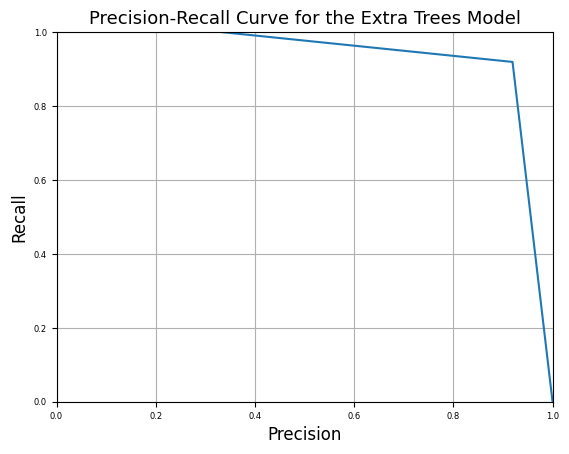

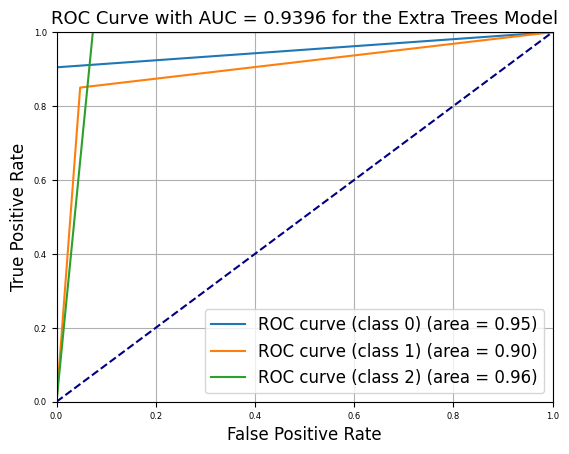

In [ ]:
# Performance evaluation using hold-out validation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np


# A. For the Classification Accuracy
classification_accuracy = accuracy_score(Y_test, Y_predict_ET)
print("Classification Accuracy: %.4f" % classification_accuracy)
print(" ")

# B. For the Classification Error
classification_error = 1 - classification_accuracy
print("Classification Error: %.4f" % classification_error)
print(" ")

# C. For the Sensitivity, Recall Score, Probability of Detection, True Positive Rate
sensitivity = recall_score(Y_test, Y_predict_ET, average="weighted")
print("Sensitivity: %.4f" % sensitivity)
print(" ")

# D. For the Specificity, True Negative Rate
TN = confusion_matrix_RF[0, 0]
FP = confusion_matrix_RF[0, 1:].sum()
specificity = TN / (TN + FP)
print("Specificity: %.4f" % specificity)
print(" ")

# E. For the False Positive Rate
false_positive_rate = 1 - specificity
print("False Positive Rate: %.4f" % false_positive_rate)
print(" ")

# F. For the False Negative Rate
false_negative_rate = 1 - sensitivity
print("False Negative Rate: %.4f" % false_negative_rate)
print(" ")

# G. For the Precision or Positive Predictive Value
precision = precision_score(Y_test, Y_predict_ET, average="weighted")
print("Precision: %.4f" % precision)
print(" ")

# H. For the F1-score
f1 = f1_score(Y_test, Y_predict_ET, average="weighted")
print("F1-score: %.4f" % f1)
print(" ")

# I. For the Classification Report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_ET))

# J. For the Precision-Recall Curve
precision_value, recall_value, _ = precision_recall_curve(label_binarize(Y_test, classes=[0, 1, 2]).ravel(), label_binarize(Y_predict_ET, classes=[0, 1, 2]).ravel())
plt.plot(precision_value, recall_value)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("Precision-Recall Curve for the Extra Trees Model", fontsize = 13)
plt.xlabel("Precision", fontsize = 12)
plt.ylabel("Recall", fontsize = 12)
plt.grid(True)
plt.show()

# K. ROC Curve with AUC
# Binarize the output
Y_test_binarized = label_binarize(Y_test, classes=[0, 1, 2])
Y_predict_binarized = label_binarize(Y_predict_ET, classes=[0, 1, 2])

# K.1 ROC Curve
FPR = dict()
TPR = dict()
roc_auc = dict()
for i in range(3):  # Assuming 3 classes
    FPR[i], TPR[i], _ = roc_curve(Y_test_binarized[:, i], Y_predict_binarized[:, i])
    roc_auc[i] = auc(FPR[i], TPR[i])

# K.2 AUC
AUC_score = roc_auc_score(Y_test_binarized, Y_predict_binarized, average="weighted")

# K.3 ROC Curve with AUC
for i in range(3):
    plt.plot(FPR[i], TPR[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

# K.4 Plot of Baseline for AUC
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title(f"ROC Curve with AUC = {AUC_score:.4f} for the Extra Trees Model", fontsize = 13)
plt.xlabel("False Positive Rate", fontsize = 12)
plt.ylabel("True Positive Rate", fontsize = 12)
plt.legend(loc="lower right", fontsize = 12)
plt.grid(True)
plt.show()

### GRADIENT BOOSTING CLASSIFIER

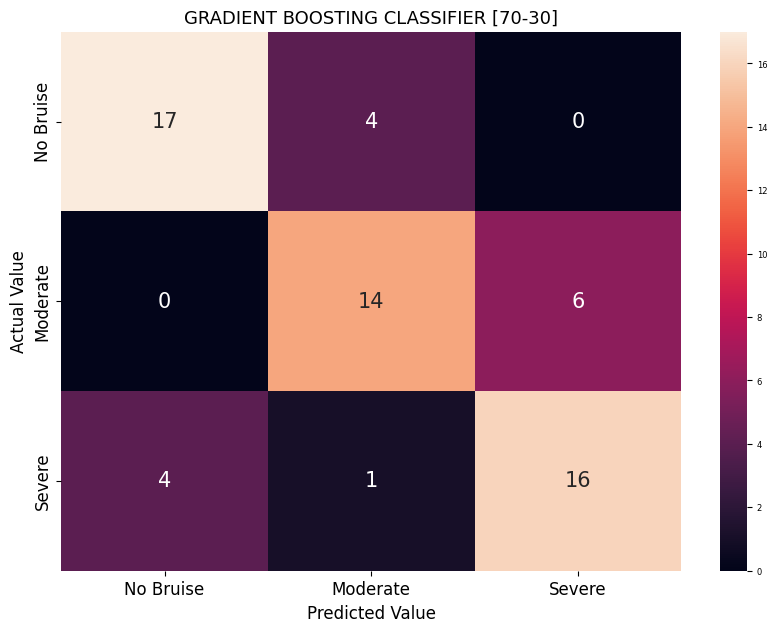

Classification Accuracy: 0.7581
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.74      0.70      0.72        20
           2       0.73      0.76      0.74        21

    accuracy                           0.76        62
   macro avg       0.76      0.76      0.76        62
weighted avg       0.76      0.76      0.76        62



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Instantiate the model
GBC = GradientBoostingClassifier(random_state=0)

# A. To Feature Scale the X variable Using the Standardization Feature Scaling
X_train_standard = X_train.copy()
X_test_standard = X_test.copy()
X_train_scaled = scaler.fit_transform(X_train_standard)
X_test_scaled = scaler.fit_transform(X_test_standard)

# Fit the training dataset into the BaggingClassifier model
GBC.fit(X_train_scaled, Y_train)
Y_predict_GBC = GBC.predict(X_test_scaled)

# Show the confusion matrix
confusion_matrix_ET = confusion_matrix(Y_test, Y_predict_GBC)
labels = ["No Bruise", "Moderate", "Severe"]
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix_ET, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, annot_kws={"size": 15})
plt.title("GRADIENT BOOSTING CLASSIFIER [70-30]", fontsize=13)
plt.xlabel("Predicted Value", fontsize=12)
plt.ylabel("Actual Value", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Classification accuracy
classification_accuracy_GBC = accuracy_score(Y_test, Y_predict_GBC)
print('Classification Accuracy: %.4f' % classification_accuracy_GBC)

# Classification report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_GBC))

#####CROSS-VALIDATION GRADIENT BOOSTING

In [ ]:
# To Apply K-Fold Cross-Validation to Assess the Model's Performance

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

k_fold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

# A. To Feature Scale the X variable Using the Standardization Feature Scaling
X_train_standard = X_train.copy()
X_train_scaled = scaler.fit_transform(X_train_standard)

## B. To Feature Select the X variable Using the Univariate Feature Selection
##selector = SelectKBest(f_classif, k=5)
##selector.fit(X_train_scaled, Y)

# B. For the Accuracy as Scoring Metric for the Cross-Validation
GBC = GradientBoostingClassifier(random_state=0)
accuracies = cross_val_score(estimator = GBC, X = X_train_scaled, y = Y_train, cv = k_fold, scoring = "accuracy")
accuracies_average = accuracies.mean()
accuracies_standard_deviation = accuracies.std()

print("Accuracies of k-Folds:", accuracies)
print(" ")
print("Average of the Accuracies of k-Folds:", accuracies_average)
print(" ")
print("Standard Deviation of the Accuracies of k-Folds:", accuracies_standard_deviation)
print(" ")

# C. For the F-1 as Scoring Metric for the Cross-Validation
f1_scores = cross_val_score(estimator = GBC, X = X_train_scaled, y = Y_train, cv = k_fold, scoring = "f1_weighted")
f1_scores_average = f1_scores.mean()
f1_scores_standard_deviation = f1_scores.std()

print("F1-scores of k-Folds:", f1_scores)
print(" ")
print("Average of the F1-scores of k-Folds:", f1_scores_average)
print(" ")
print("Standard Deviation of the F1-scores of k-Folds:", f1_scores_standard_deviation)
print(" ")

# D. For the Precision as Scoring Metric for the Cross-Validation
precision_scores = cross_val_score(estimator = GBC, X = X_train_scaled, y = Y_train, cv = k_fold, scoring = "precision_weighted")
precision_scores_average = precision_scores.mean()
precision_scores_standard_deviation = precision_scores.std()

print("Precision Scores of k-Folds:", precision_scores)
print(" ")
print("Average of the Precision Scores of k-Folds:", precision_scores_average)
print(" ")
print("Standard Deviation of the Precision Scores of k-Folds:", precision_scores_standard_deviation)
print(" ")

# E. For the Recall as Scoring Metric for the Cross-Validation
recall_scores = cross_val_score(estimator = GBC, X = X_train_scaled, y = Y_train, cv = k_fold, scoring = "recall_weighted")
recall_scores_average = recall_scores.mean()
recall_scores_standard_deviation = recall_scores.std()

print("Recall Scores of k-Folds:", recall_scores)
print(" ")
print("Average of the Recall Scores of k-Folds:", recall_scores_average)
print(" ")
print("Standard Deviation of the Recall Scores of k-Folds:", recall_scores_standard_deviation)
print(" ")

# F. For the ROC-AUC as Scoring Metric for the Cross-Validation
roc_auc_scores = cross_val_score(estimator = GBC, X = X_train_scaled, y = Y_train, cv = k_fold, scoring = "roc_auc_ovr")
roc_auc_scores_average = roc_auc_scores.mean()
roc_auc_scores_standard_deviation = roc_auc_scores.std()

print("ROC-AUC Scores of k-Folds:", roc_auc_scores)
print(" ")
print("Average of the ROC-AUC Scores of k-Folds:", roc_auc_scores_average)
print(" ")
print("Standard Deviation of the ROC-AUC Scores of k-Folds:", roc_auc_scores_standard_deviation)
print(" ")

Accuracies of k-Folds: [0.86666667 1.         1.         1.         1.         0.85714286
 0.85714286 0.85714286 1.         0.85714286]
 
Average of the Accuracies of k-Folds: 0.9295238095238096
 
Standard Deviation of the Accuracies of k-Folds: 0.07052765173932808
 
F1-scores of k-Folds: [0.86006734 1.         1.         1.         1.         0.84650072
 0.85714286 0.85714286 1.         0.85528757]
 
Average of the F1-scores of k-Folds: 0.9276141345427058
 
Standard Deviation of the F1-scores of k-Folds: 0.07245968305632672
 
Precision Scores of k-Folds: [0.89111111 1.         1.         1.         1.         0.88333333
 0.85714286 0.85714286 1.         0.86904762]
 
Average of the Precision Scores of k-Folds: 0.9357777777777777
 
Standard Deviation of the Precision Scores of k-Folds: 0.06495214820979572
 
Recall Scores of k-Folds: [0.86666667 1.         1.         1.         1.         0.85714286
 0.85714286 0.85714286 1.         0.85714286]
 
Average of the Recall Scores of k-Folds:

#####HOLD OUT VALIDATION GRADIENT BOOSTING CLASSIFIER

Classification Accuracy: 0.7581
 
Classification Error: 0.2419
 
Sensitivity: 0.7581
 
Specificity: 0.9048
 
False Positive Rate: 0.0952
 
False Negative Rate: 0.2419
 
Precision: 0.7582
 
F1-score: 0.7579
 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.74      0.70      0.72        20
           2       0.73      0.76      0.74        21

    accuracy                           0.76        62
   macro avg       0.76      0.76      0.76        62
weighted avg       0.76      0.76      0.76        62



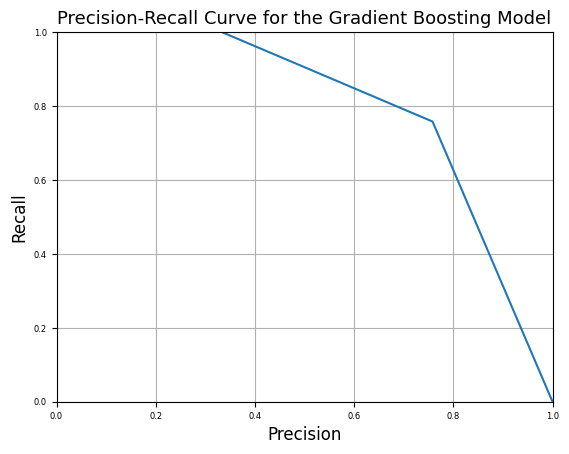

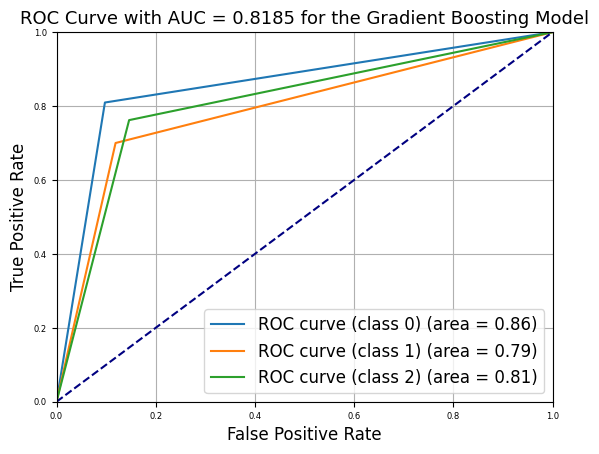

In [ ]:
# Performance evaluation using hold-out validation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# A. For the Classification Accuracy
classification_accuracy = accuracy_score(Y_test, Y_predict_GBC)
print("Classification Accuracy: %.4f" % classification_accuracy)
print(" ")

# B. For the Classification Error
classification_error = 1 - classification_accuracy
print("Classification Error: %.4f" % classification_error)
print(" ")

# C. For the Sensitivity, Recall Score, Probability of Detection, True Positive Rate
sensitivity = recall_score(Y_test, Y_predict_GBC, average="weighted")
print("Sensitivity: %.4f" % sensitivity)
print(" ")

# D. For the Specificity, True Negative Rate
TN = confusion_matrix_RF[0, 0]
FP = confusion_matrix_RF[0, 1:].sum()
specificity = TN / (TN + FP)
print("Specificity: %.4f" % specificity)
print(" ")

# E. For the False Positive Rate
false_positive_rate = 1 - specificity
print("False Positive Rate: %.4f" % false_positive_rate)
print(" ")

# F. For the False Negative Rate
false_negative_rate = 1 - sensitivity
print("False Negative Rate: %.4f" % false_negative_rate)
print(" ")

# G. For the Precision or Positive Predictive Value
precision = precision_score(Y_test, Y_predict_GBC, average="weighted")
print("Precision: %.4f" % precision)
print(" ")

# H. For the F1-score
f1 = f1_score(Y_test, Y_predict_GBC, average="weighted")
print("F1-score: %.4f" % f1)
print(" ")

# I. For the Classification Report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_GBC))

# J. For the Precision-Recall Curve
precision_value, recall_value, _ = precision_recall_curve(label_binarize(Y_test, classes=[0, 1, 2]).ravel(), label_binarize(Y_predict_GBC, classes=[0, 1, 2]).ravel())
plt.plot(precision_value, recall_value)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("Precision-Recall Curve for the Gradient Boosting Model", fontsize = 13)
plt.xlabel("Precision", fontsize = 12)
plt.ylabel("Recall", fontsize = 12)
plt.grid(True)
plt.show()

# K. ROC Curve with AUC
# Binarize the output
Y_test_binarized = label_binarize(Y_test, classes=[0, 1, 2])
Y_predict_binarized = label_binarize(Y_predict_GBC, classes=[0, 1, 2])

# K.1 ROC Curve
FPR = dict()
TPR = dict()
roc_auc = dict()
for i in range(3):  # Assuming 3 classes
    FPR[i], TPR[i], _ = roc_curve(Y_test_binarized[:, i], Y_predict_binarized[:, i])
    roc_auc[i] = auc(FPR[i], TPR[i])

# K.2 AUC
AUC_score = roc_auc_score(Y_test_binarized, Y_predict_binarized, average="weighted")

# K.3 ROC Curve with AUC
for i in range(3):
    plt.plot(FPR[i], TPR[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

# K.4 Plot of Baseline for AUC
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title(f"ROC Curve with AUC = {AUC_score:.4f} for the Gradient Boosting Model", fontsize = 13)
plt.xlabel("False Positive Rate", fontsize = 12)
plt.ylabel("True Positive Rate", fontsize = 12)
plt.legend(loc="lower right", fontsize = 12)
plt.grid(True)
plt.show()

##GRIDSEARCHCV for Gradient Booster Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the parameter grid
param_grid = {
    "clf__loss": ["log_loss"],
    "clf__learning_rate": [0.01, 0.025, 0.05, 0.1, 0.2, 0.3],
    "clf__min_samples_split": [3, 4, 5, 6, 7],
    "clf__min_samples_leaf": [2, 3, 4, 5],
    "clf__max_depth": [3, 5, 6],
    "clf__max_features": ["log2", "sqrt", None],
    "clf__criterion": ["friedman_mse", "squared_error"],
    "clf__subsample": [0.5, 0.618, 0.8, 0.9, 1.0],
    "clf__n_estimators": [20, 30, 40],
    "clf__random_state": [0]
}

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', GradientBoostingClassifier())
])

# Define cross-validation procedures
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Define the grid search
grid_search_GBC = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)

# Perform nested cross-validation
nested_scores = cross_val_score(grid_search_GBC, X, Y, cv=cv, scoring='accuracy')

print(f"Nested CV accuracy: {nested_scores.mean():.4f} ± {nested_scores.std():.4f}")

# Fit the grid search to the entire dataset
grid_search_GBC.fit(X, Y)

# Convert GridSearchCV results to a DataFrame
df = pd.DataFrame(grid_search_GBC.cv_results_)

# Extract relevant columns from the results
results = df[['param_clf__learning_rate', 'param_clf__min_samples_split', 'mean_test_score', 'std_test_score', 'params']]

# Display the results
print(results)

Fitting 5 folds for each of 32400 candidates, totalling 162000 fits
Fitting 5 folds for each of 32400 candidates, totalling 162000 fits
Fitting 5 folds for each of 32400 candidates, totalling 162000 fits
Fitting 5 folds for each of 32400 candidates, totalling 162000 fits
Fitting 5 folds for each of 32400 candidates, totalling 162000 fits
Nested CV accuracy: 0.9409 ± 0.0376
Fitting 5 folds for each of 32400 candidates, totalling 162000 fits
      param_clf__learning_rate param_clf__min_samples_split  mean_test_score  \
0                         0.01                            3         0.882195   
1                         0.01                            3         0.872317   
2                         0.01                            3         0.892073   
3                         0.01                            3         0.891951   
4                         0.01                            3         0.887073   
...                        ...                          ...              ...

In [ ]:
# Calculate the average accuracy score across the splits
df['accuracy_score'] = df[[f'split{i}_test_score' for i in range(5)]].mean(axis=1)

# Find the best parameters based on the average accuracy score
best_params = df.loc[df['accuracy_score'].idxmax()]['params']

# Extract the best parameters dictionary
best_params_dict = {key.split('__')[1]: value for key, value in best_params.items()}

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Initialize the GradientBoostingClassifier with the best parameters
best_clf_GBC = GradientBoostingClassifier(**best_params_dict)

# Fit the model using training data with the best parameters
best_clf_GBC.fit(X_train, Y_train)

# Make predictions on the test set using the best parameters
result = best_clf_GBC.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(Y_test, result)
precision = precision_score(Y_test, result, average='weighted')
recall = recall_score(Y_test, result, average='weighted')
f1 = f1_score(Y_test, result, average='weighted')
roc_auc = roc_auc_score(Y_test, best_clf_GBC.predict_proba(X_test), average='weighted', multi_class='ovr')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Display the best parameters and results
print("Best Parameters:", best_params_dict)
print("Predictions:", result)

Accuracy: 0.9024390243902439
Precision: 0.9085365853658537
Recall: 0.9024390243902439
F1 Score: 0.9021888680425264
ROC AUC Score: 0.9912246741515034
Best Parameters: {'criterion': 'squared_error', 'learning_rate': 0.3, 'loss': 'log_loss', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 30, 'random_state': 0, 'subsample': 0.5}
Predictions: [0 0 0 1 1 1 0 2 0 2 0 2 2 2 2 1 1 2 1 1 0 2 0 2 1 2 2 2 2 1 2 0 0 1 1 0 1
 1 0 2 2]


In [ ]:
# Retrieve the best estimator from grid search
best_clf_GBC = grid_search_GBC.best_estimator_

# To Apply K-Fold Cross-Validation to Assess the Model's Performance
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to evaluate model with different scoring metrics
def evaluate_model(estimator, X, y, cv, scoring):
    scores = cross_val_score(estimator, X, y, cv=cv, scoring=scoring)
    print(f"{scoring.capitalize()} Scores of k-Folds: {scores}")
    print(f"Average of the {scoring.capitalize()} Scores of k-Folds: {scores.mean()}")
    print(f"Standard Deviation of the {scoring.capitalize()} Scores of k-Folds: {scores.std()}")
    print()

# Evaluate the model with different scoring metrics
evaluate_model(best_clf_GBC, X_scaled, Y, k_fold, "accuracy")
evaluate_model(best_clf_GBC, X_scaled, Y, k_fold, "f1_weighted")
evaluate_model(best_clf_GBC, X_scaled, Y, k_fold, "precision_weighted")
evaluate_model(best_clf_GBC, X_scaled, Y, k_fold, "recall_weighted")
evaluate_model(best_clf_GBC, X_scaled, Y, k_fold, "roc_auc_ovr")

Accuracy Scores of k-Folds: [0.9047619  0.9047619  1.         0.95238095 0.9        0.95
 0.95       0.95       1.         0.75      ]
Average of the Accuracy Scores of k-Folds: 0.9261904761904762
Standard Deviation of the Accuracy Scores of k-Folds: 0.0677714580154651

F1_weighted Scores of k-Folds: [0.90277778 0.90696248 1.         0.95238095 0.89939394 0.94974359
 0.95       0.95       1.         0.74410256]
Average of the F1_weighted Scores of k-Folds: 0.9255361305361305
Standard Deviation of the F1_weighted Scores of k-Folds: 0.06932374722895839

Precision_weighted Scores of k-Folds: [0.92592593 0.92592593 1.         0.95833333 0.90625    0.95625
 0.95714286 0.95714286 1.         0.75678571]
Average of the Precision_weighted Scores of k-Folds: 0.9343756613756613
Standard Deviation of the Precision_weighted Scores of k-Folds: 0.06570714799427885

Recall_weighted Scores of k-Folds: [0.9047619  0.9047619  1.         0.95238095 0.9        0.95
 0.95       0.95       1.         0.75   

In [ ]:
# Step 8: Perform cross-validation on the best estimator found by GridSearchCV
best_clf_GBC = grid_search_GBC.best_estimator_

# To Apply K-Fold Cross-Validation to Assess the Model's Performance
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# A. For the Accuracy as Scoring Metric for the Cross-Validation
accuracies = cross_val_score(estimator=best_clf_GBC, X=X_scaled, y=Y, cv=k_fold, scoring="accuracy")
accuracies_average = accuracies.mean()
accuracies_standard_deviation = accuracies.std()

print("Accuracies of k-Folds:", accuracies)
print(" ")
print("Average of the Accuracies of k-Folds:", accuracies_average)
print(" ")
print("Standard Deviation of the Accuracies of k-Folds:", accuracies_standard_deviation)
print(" ")

# B. For the F-1 as Scoring Metric for the Cross-Validation
f1_scores = cross_val_score(estimator=best_clf_GBC, X=X_scaled, y=Y, cv=k_fold, scoring="f1_weighted")
f1_scores_average = f1_scores.mean()
f1_scores_standard_deviation = f1_scores.std()

print("F1-scores of k-Folds:", f1_scores)
print(" ")
print("Average of the F1-scores of k-Folds:", f1_scores_average)
print(" ")
print("Standard Deviation of the F1-scores of k-Folds:", f1_scores_standard_deviation)
print(" ")

# C. For the Precision as Scoring Metric for the Cross-Validation
precision_scores = cross_val_score(estimator=best_clf_GBC, X=X_scaled, y=Y, cv=k_fold, scoring="precision_weighted")
precision_scores_average = precision_scores.mean()
precision_scores_standard_deviation = precision_scores.std()

print("Precision Scores of k-Folds:", precision_scores)
print(" ")
print("Average of the Precision Scores of k-Folds:", precision_scores_average)
print(" ")
print("Standard Deviation of the Precision Scores of k-Folds:", precision_scores_standard_deviation)
print(" ")

# D. For the Recall as Scoring Metric for the Cross-Validation
recall_scores = cross_val_score(estimator=best_clf_GBC, X=X_scaled, y=Y, cv=k_fold, scoring="recall_weighted")
recall_scores_average = recall_scores.mean()
recall_scores_standard_deviation = recall_scores.std()

print("Recall Scores of k-Folds:", recall_scores)
print(" ")
print("Average of the Recall Scores of k-Folds:", recall_scores_average)
print(" ")
print("Standard Deviation of the Recall Scores of k-Folds:", recall_scores_standard_deviation)
print(" ")

# E. For the ROC-AUC as Scoring Metric for the Cross-Validation
roc_auc_scores = cross_val_score(estimator=best_clf_GBC, X=X_scaled, y=Y, cv=k_fold, scoring="roc_auc_ovr")
roc_auc_scores_average = roc_auc_scores.mean()
roc_auc_scores_standard_deviation = roc_auc_scores.std()

print("ROC-AUC Scores of k-Folds:", roc_auc_scores)
print(" ")
print("Average of the ROC-AUC Scores of k-Folds:", roc_auc_scores_average)
print(" ")
print("Standard Deviation of the ROC-AUC Scores of k-Folds:", roc_auc_scores_standard_deviation)
print(" ")

Accuracies of k-Folds: [0.9047619  0.9047619  1.         0.95238095 0.9        0.95
 0.95       0.95       1.         0.75      ]
 
Average of the Accuracies of k-Folds: 0.9261904761904762
 
Standard Deviation of the Accuracies of k-Folds: 0.0677714580154651
 
F1-scores of k-Folds: [0.90277778 0.90696248 1.         0.95238095 0.89939394 0.94974359
 0.95       0.95       1.         0.74410256]
 
Average of the F1-scores of k-Folds: 0.9255361305361305
 
Standard Deviation of the F1-scores of k-Folds: 0.06932374722895839
 
Precision Scores of k-Folds: [0.92592593 0.92592593 1.         0.95833333 0.90625    0.95625
 0.95714286 0.95714286 1.         0.75678571]
 
Average of the Precision Scores of k-Folds: 0.9343756613756613
 
Standard Deviation of the Precision Scores of k-Folds: 0.06570714799427885
 
Recall Scores of k-Folds: [0.9047619  0.9047619  1.         0.95238095 0.9        0.95
 0.95       0.95       1.         0.75      ]
 
Average of the Recall Scores of k-Folds: 0.9261904761904

Classification Accuracy: 1.0000
 
Classification Error: 0.0000
 
Sensitivity: 1.0000
 
Specificity: 1.0000
 
False Positive Rate: 0.0000
 
False Negative Rate: 0.0000
 
Precision: 1.0000
 
F1-score: 1.0000
 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        14

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



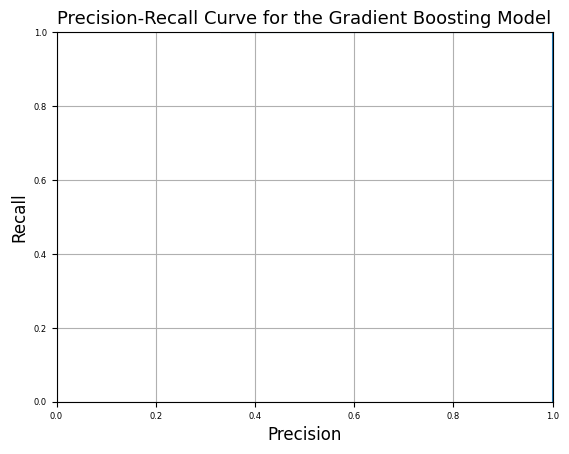

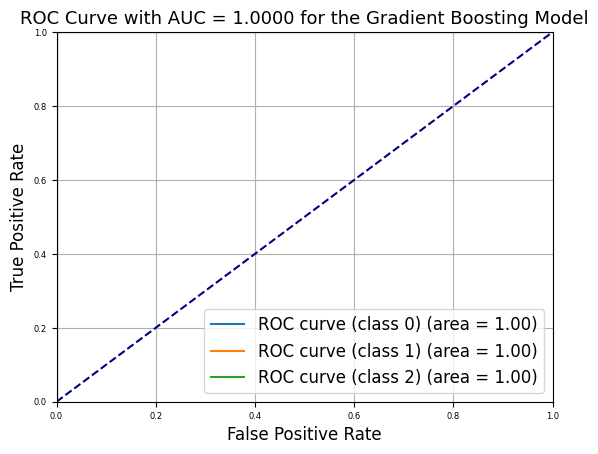

In [ ]:
# Performance evaluation using hold-out validation
Y_predict_GBC1 = best_clf_GBC.predict(X_test)

# A. For the Classification Accuracy
classification_accuracy = accuracy_score(Y_test, Y_predict_GBC1)
print("Classification Accuracy: %.4f" % classification_accuracy)
print(" ")

# B. For the Classification Error
classification_error = 1 - classification_accuracy
print("Classification Error: %.4f" % classification_error)
print(" ")

# C. For the Sensitivity, Recall Score, Probability of Detection, True Positive Rate
sensitivity = recall_score(Y_test, Y_predict_GBC1, average="weighted", zero_division=0)
print("Sensitivity: %.4f" % sensitivity)
print(" ")

# D. For the Specificity, True Negative Rate
confusion_matrix_GBC1 = confusion_matrix(Y_test, Y_predict_GBC1)
TN = confusion_matrix_GBC1[0, 0]
FP = confusion_matrix_GBC1[0, 1:].sum()
specificity = TN / (TN + FP)
print("Specificity: %.4f" % specificity)
print(" ")

# E. For the False Positive Rate
false_positive_rate = 1 - specificity
print("False Positive Rate: %.4f" % false_positive_rate)
print(" ")

# F. For the False Negative Rate
false_negative_rate = 1 - sensitivity
print("False Negative Rate: %.4f" % false_negative_rate)
print(" ")

# G. For the Precision or Positive Predictive Value
precision = precision_score(Y_test, Y_predict_GBC1, average="weighted", zero_division=0)
print("Precision: %.4f" % precision)
print(" ")

# H. For the F1-score
f1 = f1_score(Y_test, Y_predict_GBC1, average="weighted", zero_division=0)
print("F1-score: %.4f" % f1)
print(" ")

# I. For the Classification Report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_GBC1, zero_division=0))

# J. For the Precision-Recall Curve
precision_value, recall_value, _ = precision_recall_curve(label_binarize(Y_test, classes=[0, 1, 2]).ravel(), label_binarize(Y_predict_GBC1, classes=[0, 1, 2]).ravel())
plt.plot(precision_value, recall_value)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("Precision-Recall Curve for the Gradient Boosting Model", fontsize=13)
plt.xlabel("Precision", fontsize=12)
plt.ylabel("Recall", fontsize=12)
plt.grid(True)
plt.show()

# K. ROC Curve with AUC
# Binarize the output
Y_test_binarized = label_binarize(Y_test, classes=[0, 1, 2])
Y_predict_binarized = label_binarize(Y_predict_GBC1, classes=[0, 1, 2])

# K.1 ROC Curve
FPR = dict()
TPR = dict()
roc_auc = dict()
for i in range(3):  # Assuming 3 classes
    FPR[i], TPR[i], _ = roc_curve(Y_test_binarized[:, i], Y_predict_binarized[:, i])
    roc_auc[i] = auc(FPR[i], TPR[i])

# K.2 AUC
AUC_score = roc_auc_score(Y_test_binarized, Y_predict_binarized, average="weighted")

# K.3 ROC Curve with AUC
for i in range(3):
    plt.plot(FPR[i], TPR[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

# K.4 Plot of Baseline for AUC
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title(f"ROC Curve with AUC = {AUC_score:.4f} for the Gradient Boosting Model", fontsize=13)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

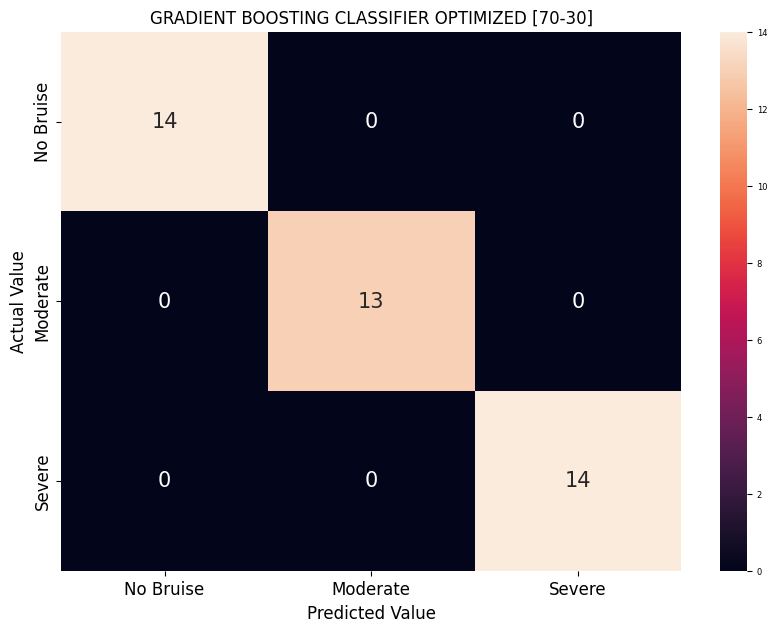

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Predict the labels for the test set
Y_predict_GBC1 = best_clf_GBC.predict(X_test)

# Show the confusion matrix
confusion_matrix_ET = confusion_matrix(Y_test, Y_predict_GBC1)
labels = ["No Bruise", "Moderate", "Severe"]
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix_ET, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, annot_kws={"size": 15})
plt.title("GRADIENT BOOSTING CLASSIFIER OPTIMIZED [70-30]", fontsize=12)
plt.xlabel("Predicted Value", fontsize=12)
plt.ylabel("Actual Value", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##GRIDSEARCHCV for Random Forest Classifier

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Define the parameter grid
param_grid = {
    "clf__n_estimators": [50, 100, 200],
    "clf__max_depth": [None, 10, 20, 30],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 4],
    "clf__max_features": ["sqrt", "log2"],
    "clf__bootstrap": [True, False],
    "clf__criterion": ["gini", "entropy"],
    "clf__random_state": [0]
}

# Define the pipeline
pipeline_RF = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

# Define the outer cross-validation procedure
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Define the inner cross-validation procedure
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Define the grid search
grid_search_RF = GridSearchCV(estimator=pipeline_RF, param_grid=param_grid, scoring='accuracy', cv=inner_cv, n_jobs=-1, verbose=1)

# Perform nested cross-validation
nested_scores = cross_val_score(grid_search_RF, X, Y, cv=outer_cv, scoring='accuracy')
print(f"Nested CV accuracy: {nested_scores.mean():.4f} ± {nested_scores.std():.4f}")

# Fit the model to get cv_results_
grid_search_RF.fit(X, Y)

# Convert GridSearchCV results to a DataFrame
df = pd.DataFrame.from_dict(grid_search_RF.cv_results_)

# Calculate the average accuracy score across all splits
split_columns = [col for col in df.columns if "split" in col and "test_score" in col]
df['accuracy_score'] = df[split_columns].mean(axis=1)

# Check for NaN values and handle them
if df['accuracy_score'].isna().sum() > 0:
    print("There are NaN values in the accuracy_score column.")
    df = df.dropna(subset=['accuracy_score'])

# Ensure that there are no NaN values before finding the best parameters
if df['accuracy_score'].isna().sum() == 0:
    best_params = df.loc[df['accuracy_score'].idxmax()]['params']
else:
    raise ValueError("There are still NaN values in the accuracy_score column after dropping them.")

# Debug: Inspect the structure of best_params
print("Best Params Structure:", best_params)

# Extract the parameters for the RandomForestClassifier
best_clf_params = {k.replace('clf__', ''): v for k, v in best_params.items() if k.startswith('clf__')}
best_clf = RandomForestClassifier(**best_clf_params)

# Fit the model using training data with the best parameters
best_clf.fit(X_train, Y_train)

# Make predictions on the test set using the best parameters
result = best_clf.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(Y_test, result)
precision = precision_score(Y_test, result, average='weighted')
recall = recall_score(Y_test, result, average='weighted')
f1 = f1_score(Y_test, result, average='weighted')
roc_auc = roc_auc_score(label_binarize(Y_test, classes=[0, 1, 2]), best_clf.predict_proba(X_test), average='weighted', multi_class='ovr')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Display the best parameters and results
print("Best Parameters:", best_params)
print("Predictions:", result)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Nested CV accuracy: 0.9410 ± 0.0256
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Params Structure: {'clf__bootstrap': True, 'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 50, 'clf__random_state': 0}
Accuracy: 0.9193548387096774
Precision: 0.9231252618349393
Recall: 0.9193548387096774
F1 Score: 0.9200945053336506
ROC AUC Score: 0.9870134127608556
Best Parameters: {'clf__bootstrap': True, 'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estima

In [ ]:
# Perform cross-validation on the best estimator found by GridSearchCV
best_estimator_RF = best_clf

# Apply K-Fold Cross-Validation to Assess the Model's Performance
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Accuracy as Scoring Metric for the Cross-Validation
accuracies = cross_val_score(estimator=best_estimator_RF, X=X_scaled, y=Y, cv=k_fold, scoring="accuracy")
accuracies_average = accuracies.mean()
accuracies_standard_deviation = accuracies.std()

print("Accuracies of k-Folds:", accuracies)
print(" ")
print("Average of the Accuracies of k-Folds:", accuracies_average)
print(" ")
print("Standard Deviation of the Accuracies of k-Folds:", accuracies_standard_deviation)
print(" ")

# F-1 as Scoring Metric for the Cross-Validation
f1_scores = cross_val_score(estimator=best_estimator_RF, X=X_scaled, y=Y, cv=k_fold, scoring="f1_weighted")
f1_scores_average = f1_scores.mean()
f1_scores_standard_deviation = f1_scores.std()

print("F1-scores of k-Folds:", f1_scores)
print(" ")
print("Average of the F1-scores of k-Folds:", f1_scores_average)
print(" ")
print("Standard Deviation of the F1-scores of k-Folds:", f1_scores_standard_deviation)
print(" ")

# Precision as Scoring Metric for the Cross-Validation
precision_scores = cross_val_score(estimator=best_estimator_RF, X=X_scaled, y=Y, cv=k_fold, scoring="precision_weighted")
precision_scores_average = precision_scores.mean()
precision_scores_standard_deviation = precision_scores.std()

print("Precision Scores of k-Folds:", precision_scores)
print(" ")
print("Average of the Precision Scores of k-Folds:", precision_scores_average)
print(" ")
print("Standard Deviation of the Precision Scores of k-Folds:", precision_scores_standard_deviation)
print(" ")

# Recall as Scoring Metric for the Cross-Validation
recall_scores = cross_val_score(estimator=best_estimator_RF, X=X_scaled, y=Y, cv=k_fold, scoring="recall_weighted")
recall_scores_average = recall_scores.mean()
recall_scores_standard_deviation = recall_scores.std()

print("Recall Scores of k-Folds:", recall_scores)
print(" ")
print("Average of the Recall Scores of k-Folds:", recall_scores_average)
print(" ")
print("Standard Deviation of the Recall Scores of k-Folds:", recall_scores_standard_deviation)
print(" ")

# ROC-AUC as Scoring Metric for the Cross-Validation
roc_auc_scores = cross_val_score(estimator=best_estimator_RF, X=X_scaled, y=Y, cv=k_fold, scoring="roc_auc_ovr")
roc_auc_scores_average = roc_auc_scores.mean()
roc_auc_scores_standard_deviation = roc_auc_scores.std()

print("ROC-AUC Scores of k-Folds:", roc_auc_scores)
print(" ")
print("Average of the ROC-AUC Scores of k-Folds:", roc_auc_scores_average)
print(" ")
print("Standard Deviation of the ROC-AUC Scores of k-Folds:", roc_auc_scores_standard_deviation)
print(" ")

Accuracies of k-Folds: [0.95238095 0.95238095 0.95238095 0.95238095 0.95       0.95
 0.95       0.95       1.         0.8       ]
 
Average of the Accuracies of k-Folds: 0.940952380952381
 
Standard Deviation of the Accuracies of k-Folds: 0.0491976438792073
 
F1-scores of k-Folds: [0.95213675 0.95238095 0.95180375 0.95238095 0.94939394 0.94974359
 0.94974359 0.95       1.         0.79047619]
 
Average of the F1-scores of k-Folds: 0.9398059718059718
 
Standard Deviation of the F1-scores of k-Folds: 0.05189250388777152
 
Precision Scores of k-Folds: [0.95833333 0.95833333 0.95833333 0.95833333 0.95625    0.95625
 0.95625    0.95714286 1.         0.805     ]
 
Average of the Precision Scores of k-Folds: 0.9464226190476189
 
Standard Deviation of the Precision Scores of k-Folds: 0.0488293038463139
 
Recall Scores of k-Folds: [0.95238095 0.95238095 0.95238095 0.95238095 0.95       0.95
 0.95       0.95       1.         0.8       ]
 
Average of the Recall Scores of k-Folds: 0.940952380952381

Classification Accuracy: 0.9194
 
Classification Error: 0.0806
 
Sensitivity: 0.9194
 
Specificity: 0.9048
 
False Positive Rate: 0.0952
 
False Negative Rate: 0.0806
 
Precision: 0.9231
 
F1-score: 0.9201
 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.86      0.90      0.88        20
           2       0.91      0.95      0.93        21

    accuracy                           0.92        62
   macro avg       0.92      0.92      0.92        62
weighted avg       0.92      0.92      0.92        62



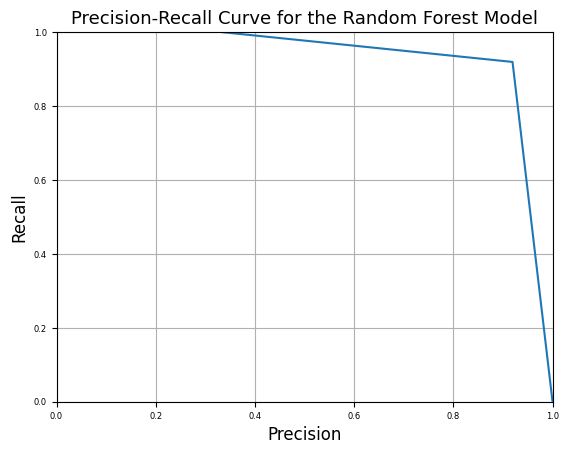

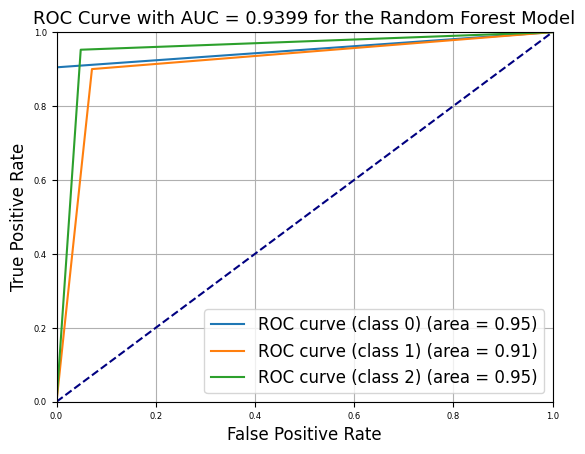

In [ ]:
# Performance evaluation using hold-out validation
best_estimator = grid_search_RF.best_estimator_
Y_predict_RF1 = best_estimator_RF.predict(X_test)

# Classification Accuracy
classification_accuracy = accuracy_score(Y_test, Y_predict_RF1)
print("Classification Accuracy: %.4f" % classification_accuracy)
print(" ")

# Classification Error
classification_error = 1 - classification_accuracy
print("Classification Error: %.4f" % classification_error)
print(" ")

# Sensitivity, Recall Score, Probability of Detection, True Positive Rate
sensitivity = recall_score(Y_test, Y_predict_RF1, average="weighted", zero_division=0)
print("Sensitivity: %.4f" % sensitivity)
print(" ")

# Specificity, True Negative Rate
confusion_matrix_RF = confusion_matrix(Y_test, Y_predict_RF1)
TN = confusion_matrix_RF[0, 0]
FP = confusion_matrix_RF[0, 1:].sum()
specificity = TN / (TN + FP)
print("Specificity: %.4f" % specificity)
print(" ")

# False Positive Rate
false_positive_rate = 1 - specificity
print("False Positive Rate: %.4f" % false_positive_rate)
print(" ")

# False Negative Rate
false_negative_rate = 1 - sensitivity
print("False Negative Rate: %.4f" % false_negative_rate)
print(" ")

# Precision or Positive Predictive Value
precision = precision_score(Y_test, Y_predict_RF1, average="weighted", zero_division=0)
print("Precision: %.4f" % precision)
print(" ")

# F1-score
f1 = f1_score(Y_test, Y_predict_RF1, average="weighted", zero_division=0)
print("F1-score: %.4f" % f1)
print(" ")

# Classification Report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_RF1, zero_division=0))

# Precision-Recall Curve
precision_value, recall_value, _ = precision_recall_curve(
    label_binarize(Y_test, classes=[0, 1, 2]).ravel(),
    label_binarize(Y_predict_RF1, classes=[0, 1, 2]).ravel()
)
plt.plot(precision_value, recall_value)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("Precision-Recall Curve for the Random Forest Model", fontsize=13)
plt.xlabel("Precision", fontsize=12)
plt.ylabel("Recall", fontsize=12)
plt.grid(True)
plt.show()

# ROC Curve with AUC
# Binarize the output
Y_test_binarized = label_binarize(Y_test, classes=[0, 1, 2])
Y_predict_binarized = label_binarize(Y_predict_RF1, classes=[0, 1, 2])

# ROC Curve
FPR = dict()
TPR = dict()
roc_auc = dict()
for i in range(3):  # Assuming 3 classes
    FPR[i], TPR[i], _ = roc_curve(Y_test_binarized[:, i], Y_predict_binarized[:, i])
    roc_auc[i] = auc(FPR[i], TPR[i])

# AUC
AUC_score = roc_auc_score(Y_test_binarized, Y_predict_binarized, average="weighted")

# ROC Curve with AUC
for i in range(3):
    plt.plot(FPR[i], TPR[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

# Plot of Baseline for AUC
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title(f"ROC Curve with AUC = {AUC_score:.4f} for the Random Forest Model", fontsize=13)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

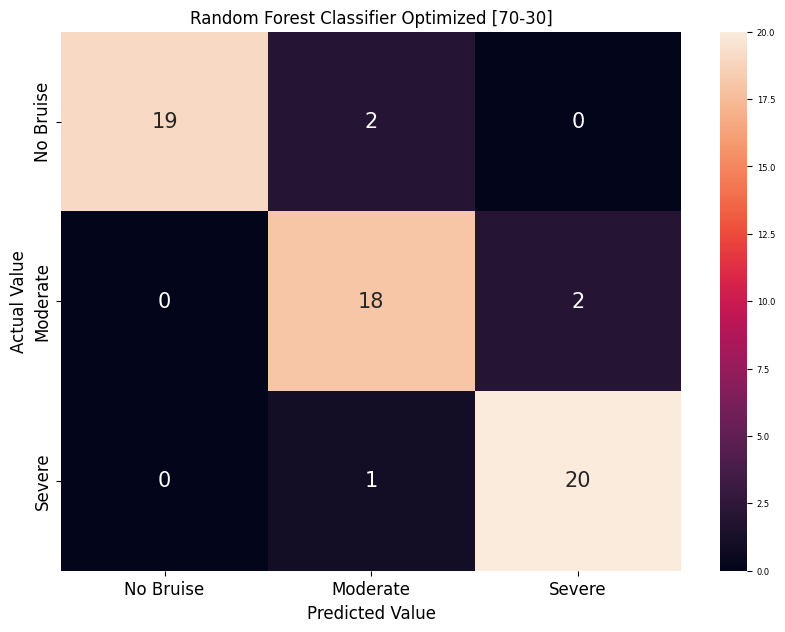

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Predict the labels for the test set
Y_predict_RF1 = best_estimator_RF.predict(X_test)

# Show the confusion matrix
confusion_matrix_RF = confusion_matrix(Y_test, Y_predict_RF1)
labels = ["No Bruise", "Moderate", "Severe"]
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_RF, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, annot_kws={"size": 15})
plt.title("Random Forest Classifier Optimized [70-30]", fontsize=12)
plt.xlabel("Predicted Value", fontsize=12)
plt.ylabel("Actual Value", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##GRIDSEARCHCV for Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve, auc, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Define the parameter grid
param_grid = {
    "clf__n_estimators": [50, 100, 200],
    "clf__max_depth": [None, 10, 20, 30],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 4],
    "clf__max_features": ["sqrt", "log2"],
    "clf__bootstrap": [True, False],
    "clf__criterion": ["gini", "entropy"],
    "clf__random_state": [0]
}

# Define the pipeline
pipeline_ET = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', ExtraTreesClassifier())
])

# Define the outer cross-validation procedure
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Define the inner cross-validation procedure
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Define the grid search
grid_search_ET = GridSearchCV(estimator=pipeline_ET, param_grid=param_grid, scoring='accuracy', cv=inner_cv, n_jobs=-1, verbose=1)

# Perform nested cross-validation
nested_scores = cross_val_score(grid_search_ET, X, Y, cv=outer_cv, scoring='accuracy')

print(f"Nested CV accuracy: {nested_scores.mean():.4f} ± {nested_scores.std():.4f}")

# Fit the model to get cv_results_
grid_search_ET.fit(X, Y)

# Convert GridSearchCV results to a DataFrame
df1 = pd.DataFrame.from_dict(grid_search_ET.cv_results_)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Nested CV accuracy: 0.9754 ± 0.0158
Fitting 5 folds for each of 864 candidates, totalling 4320 fits


In [ ]:
# Calculate the average accuracy score across all splits
split_columns = [col for col in df.columns if "split" in col and "test_score" in col]
df['accuracy_score'] = df[split_columns].mean(axis=1)

# Check for NaN values and handle them
if df['accuracy_score'].isna().sum() > 0:
    print("There are NaN values in the accuracy_score column.")
    df = df.dropna(subset=['accuracy_score'])

# Ensure that there are no NaN values before finding the best parameters
if df['accuracy_score'].isna().sum() == 0:
    best_params = df.loc[df['accuracy_score'].idxmax()]['params']
else:
    raise ValueError("There are still NaN values in the accuracy_score column after dropping them.")

# Debug: Inspect the structure of best_params
print("Best Params Structure:", best_params)

# Initialize the ExtraTreesClassifier with the best parameters
# Extract the parameters for the ExtraTreesClassifier
best_clf_params = {k.replace('clf__', ''): v for k, v in best_params.items() if k.startswith('clf__')}
best_clf_ET = ExtraTreesClassifier(**best_clf_params)

# Fit the model using training data with the best parameters
best_clf_ET.fit(X_train_scaled, Y_train)

# Make predictions on the test set using the best parameters
result = best_clf_ET.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(Y_test, result)
precision = precision_score(Y_test, result, average='weighted')
recall = recall_score(Y_test, result, average='weighted')
f1 = f1_score(Y_test, result, average='weighted')
roc_auc = roc_auc_score(label_binarize(Y_test, classes=[0, 1, 2]), best_clf.predict_proba(X_test), average='weighted', multi_class='ovr')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Display the best parameters and results
print("Best Parameters:", best_params)
print("Predictions:", result)

Best Params Structure: {'clf__bootstrap': True, 'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 50, 'clf__random_state': 0}
Accuracy: 0.9032258064516129
Precision: 0.9099641577060932
Recall: 0.9032258064516129
F1 Score: 0.9026777146231638
ROC AUC Score: 0.9870134127608556
Best Parameters: {'clf__bootstrap': True, 'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 50, 'clf__random_state': 0}
Predictions: [0 0 0 1 2 1 0 1 0 2 0 2 2 2 2 1 2 2 1 1 0 2 0 2 1 2 2 2 2 1 2 0 0 1 1 0 1
 1 0 2 1 1 0 0 1 2 2 0 1 2 1 2 2 2 2 2 0 0 1 0 0 2]


In [ ]:
# Perform cross-validation on the best estimator found by GridSearchCV
best_estimator_ET = best_clf_ET

# Apply K-Fold Cross-Validation to Assess the Model's Performance
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Accuracy as Scoring Metric for the Cross-Validation
accuracies = cross_val_score(estimator=best_estimator_ET, X=X_scaled, y=Y, cv=k_fold, scoring="accuracy")
accuracies_average = accuracies.mean()
accuracies_standard_deviation = accuracies.std()

print("Accuracies of k-Folds:", accuracies)
print(" ")
print("Average of the Accuracies of k-Folds:", accuracies_average)
print(" ")
print("Standard Deviation of the Accuracies of k-Folds:", accuracies_standard_deviation)
print(" ")

# F-1 as Scoring Metric for the Cross-Validation
f1_scores = cross_val_score(estimator=best_estimator_ET, X=X_scaled, y=Y, cv=k_fold, scoring="f1_weighted")
f1_scores_average = f1_scores.mean()
f1_scores_standard_deviation = f1_scores.std()

print("F1-scores of k-Folds:", f1_scores)
print(" ")
print("Average of the F1-scores of k-Folds:", f1_scores_average)
print(" ")
print("Standard Deviation of the F1-scores of k-Folds:", f1_scores_standard_deviation)
print(" ")

# Precision as Scoring Metric for the Cross-Validation
precision_scores = cross_val_score(estimator=best_estimator_ET, X=X_scaled, y=Y, cv=k_fold, scoring="precision_weighted")
precision_scores_average = precision_scores.mean()
precision_scores_standard_deviation = precision_scores.std()

print("Precision Scores of k-Folds:", precision_scores)
print(" ")
print("Average of the Precision Scores of k-Folds:", precision_scores_average)
print(" ")
print("Standard Deviation of the Precision Scores of k-Folds:", precision_scores_standard_deviation)
print(" ")

# Recall as Scoring Metric for the Cross-Validation
recall_scores = cross_val_score(estimator=best_estimator_ET, X=X_scaled, y=Y, cv=k_fold, scoring="recall_weighted")
recall_scores_average = recall_scores.mean()
recall_scores_standard_deviation = recall_scores.std()

print("Recall Scores of k-Folds:", recall_scores)
print(" ")
print("Average of the Recall Scores of k-Folds:", recall_scores_average)
print(" ")
print("Standard Deviation of the Recall Scores of k-Folds:", recall_scores_standard_deviation)
print(" ")

# ROC-AUC as Scoring Metric for the Cross-Validation
roc_auc_scores = cross_val_score(estimator=best_estimator_ET, X=X_scaled, y=Y, cv=k_fold, scoring="roc_auc_ovr")
roc_auc_scores_average = roc_auc_scores.mean()
roc_auc_scores_standard_deviation = roc_auc_scores.std()

print("ROC-AUC Scores of k-Folds:", roc_auc_scores)
print(" ")
print("Average of the ROC-AUC Scores of k-Folds:", roc_auc_scores_average)
print(" ")
print("Standard Deviation of the ROC-AUC Scores of k-Folds:", roc_auc_scores_standard_deviation)
print(" ")

Accuracies of k-Folds: [1.   1.   1.   1.   1.   0.95 1.   0.95 1.   0.85]
 
Average of the Accuracies of k-Folds: 0.975
 
Standard Deviation of the Accuracies of k-Folds: 0.04609772228646445
 
F1-scores of k-Folds: [1.         1.         1.         1.         1.         0.94974359
 1.         0.95       1.         0.84945055]
 
Average of the F1-scores of k-Folds: 0.974919413919414
 
Standard Deviation of the F1-scores of k-Folds: 0.04626065915131909
 
Precision Scores of k-Folds: [1.         1.         1.         1.         1.         0.95625
 1.         0.95714286 1.         0.86666667]
 
Average of the Precision Scores of k-Folds: 0.9780059523809523
 
Standard Deviation of the Precision Scores of k-Folds: 0.040854857318274845
 
Recall Scores of k-Folds: [1.   1.   1.   1.   1.   0.95 1.   0.95 1.   0.85]
 
Average of the Recall Scores of k-Folds: 0.975
 
Standard Deviation of the Recall Scores of k-Folds: 0.04609772228646445
 
ROC-AUC Scores of k-Folds: [1.         1.         1.   

Classification Accuracy: 0.9032
 
Classification Error: 0.0968
 
Sensitivity: 0.9032
 
Specificity: 0.9048
 
False Positive Rate: 0.0952
 
False Negative Rate: 0.0968
 
Precision: 0.9100
 
F1-score: 0.9027
 
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.89      0.80      0.84        20
           2       0.84      1.00      0.91        21

    accuracy                           0.90        62
   macro avg       0.91      0.90      0.90        62
weighted avg       0.91      0.90      0.90        62



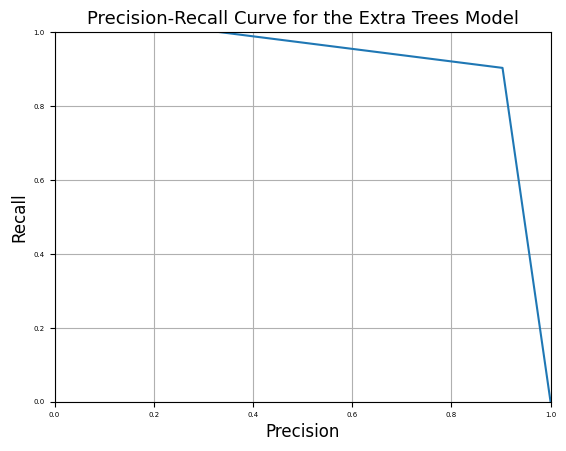

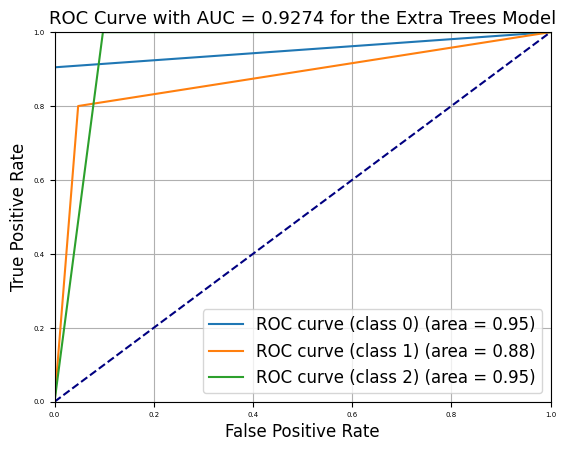

In [ ]:
# Performance evaluation using hold-out validation
Y_predict_ET1 = best_estimator_ET.predict(X_test)

# Classification Accuracy
classification_accuracy = accuracy_score(Y_test, Y_predict_ET1)
print("Classification Accuracy: %.4f" % classification_accuracy)
print(" ")

# Classification Error
classification_error = 1 - classification_accuracy
print("Classification Error: %.4f" % classification_error)
print(" ")

# Sensitivity, Recall Score, Probability of Detection, True Positive Rate
sensitivity = recall_score(Y_test, Y_predict_ET1, average="weighted", zero_division=0)
print("Sensitivity: %.4f" % sensitivity)
print(" ")

# Specificity, True Negative Rate
confusion_matrix_ET = confusion_matrix(Y_test, Y_predict_ET1)
TN = confusion_matrix_ET[0, 0]
FP = confusion_matrix_ET[0, 1:].sum()
specificity = TN / (TN + FP)
print("Specificity: %.4f" % specificity)
print(" ")

# False Positive Rate
false_positive_rate = 1 - specificity
print("False Positive Rate: %.4f" % false_positive_rate)
print(" ")

# False Negative Rate
false_negative_rate = 1 - sensitivity
print("False Negative Rate: %.4f" % false_negative_rate)
print(" ")

# Precision or Positive Predictive Value
precision = precision_score(Y_test, Y_predict_ET1, average="weighted", zero_division=0)
print("Precision: %.4f" % precision)
print(" ")

# F1-score
f1 = f1_score(Y_test, Y_predict_ET1, average="weighted", zero_division=0)
print("F1-score: %.4f" % f1)
print(" ")

# Classification Report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_ET1, zero_division=0))

# Precision-Recall Curve
precision_value, recall_value, _ = precision_recall_curve(
    label_binarize(Y_test, classes=[0, 1, 2]).ravel(),
    label_binarize(Y_predict_ET1, classes=[0, 1, 2]).ravel()
)
plt.plot(precision_value, recall_value)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("Precision-Recall Curve for the Extra Trees Model", fontsize=13)
plt.xlabel("Precision", fontsize=12)
plt.ylabel("Recall", fontsize=12)
plt.grid(True)
plt.show()

# ROC Curve with AUC
# Binarize the output
Y_test_binarized = label_binarize(Y_test, classes=[0, 1, 2])
Y_predict_binarized = label_binarize(Y_predict_ET1, classes=[0, 1, 2])

# ROC Curve
FPR = dict()
TPR = dict()
roc_auc = dict()
for i in range(3):  # Assuming 3 classes
    FPR[i], TPR[i], _ = roc_curve(Y_test_binarized[:, i], Y_predict_binarized[:, i])
    roc_auc[i] = auc(FPR[i], TPR[i])

# AUC
AUC_score = roc_auc_score(Y_test_binarized, Y_predict_binarized, average="weighted")

# ROC Curve with AUC
for i in range(3):
    plt.plot(FPR[i], TPR[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

# Plot of Baseline for AUC
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title(f"ROC Curve with AUC = {AUC_score:.4f} for the Extra Trees Model", fontsize=13)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

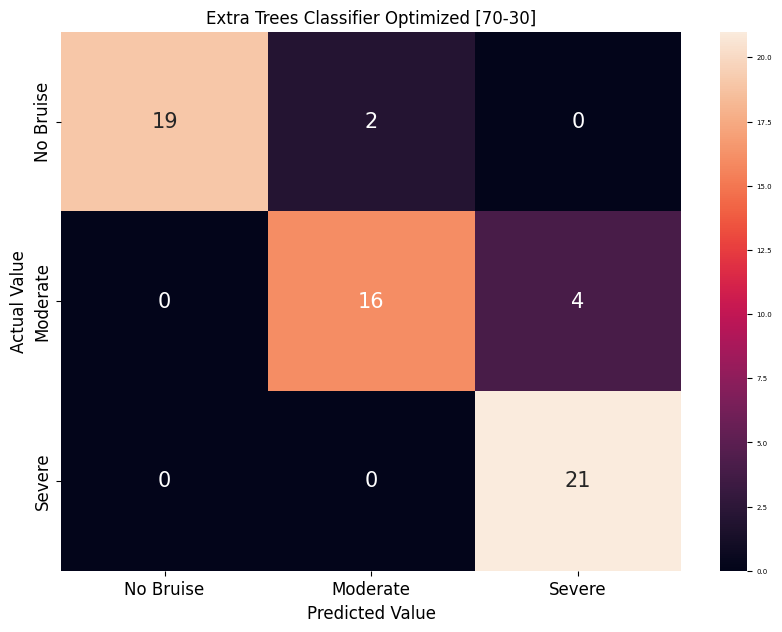

In [ ]:
# Predict the labels for the test set
Y_predict_ET1 = best_estimator_ET.predict(X_test)

# Show the confusion matrix
confusion_matrix_RF = confusion_matrix(Y_test, Y_predict_ET1)
labels = ["No Bruise", "Moderate", "Severe"]
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_RF, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, annot_kws={"size": 15})
plt.title("Extra Trees Classifier Optimized [70-30]", fontsize=12)
plt.xlabel("Predicted Value", fontsize=12)
plt.ylabel("Actual Value", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#SAVE MODEL

In [ ]:
# To Save the Model Using Joblib

from joblib import dump # to serialize
from joblib import load # to deserialize

## To Save the Model
#dump(random_forest, "random_forest.pkl")
dump(best_estimator_RF, "random_forest.pkl")
#dump(bagging_classifier, "bagging_classifier.pkl")
#dump(extra_trees, "extra_trees.pkl")

['random_forest.pkl']

In [ ]:
from joblib import dump # to serialize
from joblib import load # to deserialize


X_test_standard = X_test.copy()

## To Load the Model
rfc_from_joblib = load("random_forest.pkl")

## To Make Prediction
Y_predictions_from_joblib = rfc_from_joblib.predict(X_test_standard)